# CHURN EDA NOTEBOOK

In [104]:
import pandas as pd 
import numpy as np
import seaborn as sns
import os 
import matplotlib.pyplot as plt 
import warnings 

## Directory 

In [105]:
os.getcwd()

'C:\\Users\\Kaushik\\OneDrive\\Ivy Data Science Notes\\Python Programs'

## Importing the csv file i.e the dataset is stored as a dataframe

In [106]:
df=pd.read_csv('C:\\Users\\Kaushik\\OneDrive\\Mphasis Internship\\Datasets\\Telechurn - copy.csv')

## Checking the top 5 rows in the dataframe

In [107]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Checking whether null values exists or not

In [108]:
#Checking null values 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### No null values in this dataset 

## Checking the datatypes of the attributes in this dataframe

In [109]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Converting Total Charges as float because it is illogical to have total charges in string and will affect our analysis

In [110]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

#### Changing senior citizen values 1-yes, 0-no because having categorical values as integers will affect EDA 

In [111]:
#Renaming senior citizen 1-yes, 0-no
df['SeniorCitizen'].replace([1, 0] , ['yes','no'] , inplace = True)

# General Analysis

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [113]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


# Visualizations 

### Univariate Analysis

### Forming histograms

array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'TotalCharges'}>, <AxesSubplot:>]],
      dtype=object)

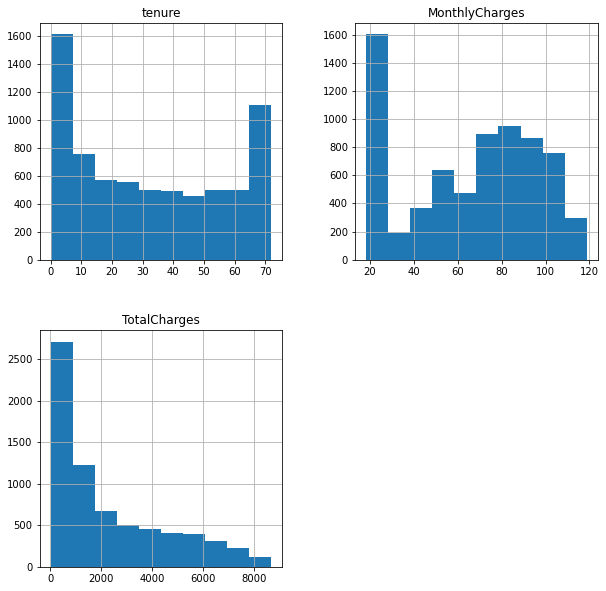

In [114]:
df.hist(figsize=(10,10))

## Bargraphs for the categorical variables 

In [115]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(25,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

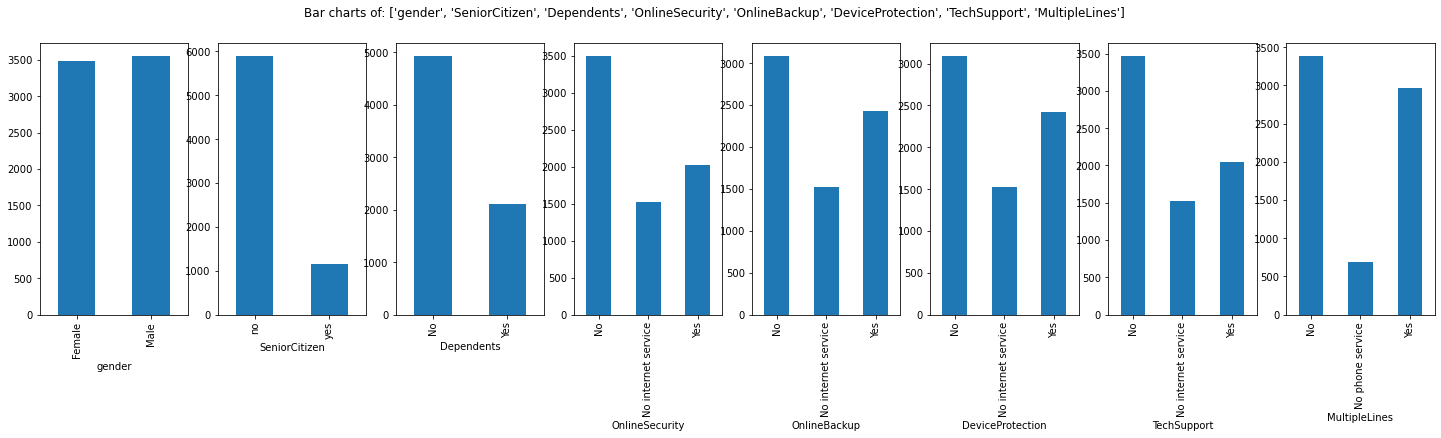

In [116]:
PlotBarCharts(inpData=df, colsToPlot=['gender','SeniorCitizen','Dependents','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','MultipleLines'])

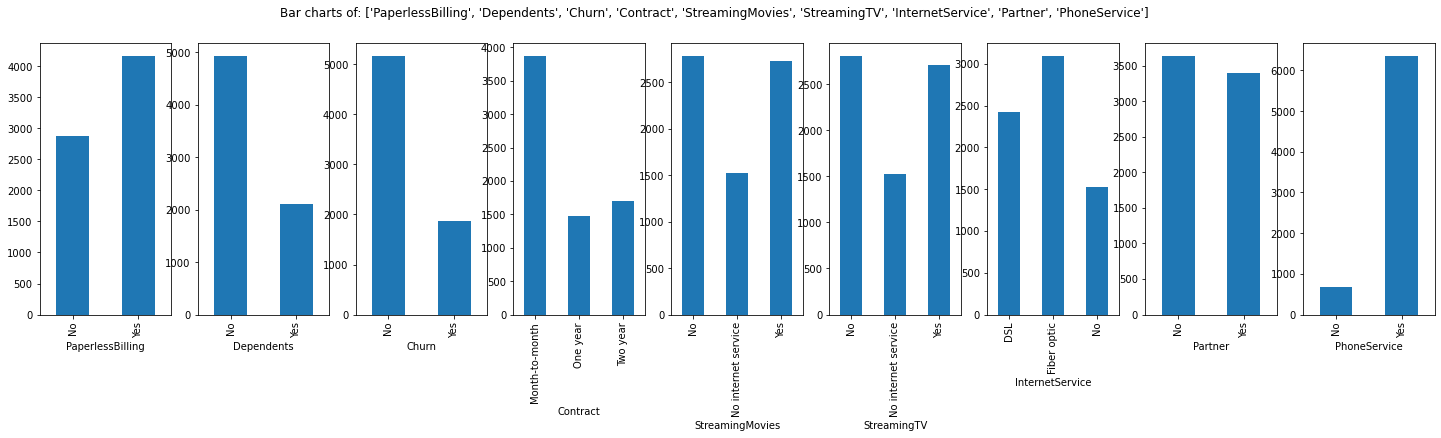

In [117]:
PlotBarCharts(inpData=df, colsToPlot=['PaperlessBilling','Dependents','Churn','Contract','StreamingMovies','StreamingTV','InternetService','Partner','PhoneService'])

## Bi-variate analysis

### General Exploration using pivot function and pie charts 

<AxesSubplot:ylabel='Churn'>

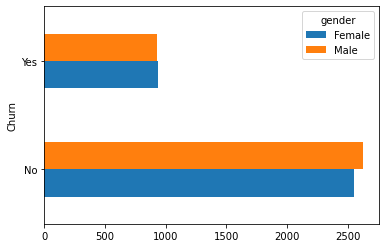

In [118]:
df['COUNT']=1
df.pivot_table(index='Churn',columns='gender',values='COUNT',aggfunc='sum').plot(kind='barh')


<AxesSubplot:>

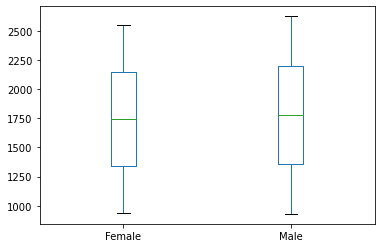

In [119]:
df['COUNT']=1
df.pivot_table(index='Churn',columns='gender',values='COUNT',aggfunc='sum').plot(kind='box')


<AxesSubplot:xlabel='SeniorCitizen'>

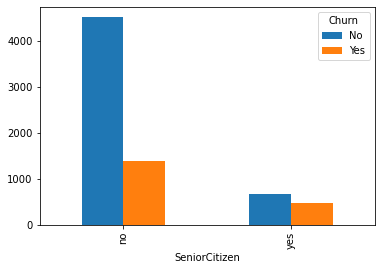

In [120]:
df.pivot_table(index='SeniorCitizen',columns='Churn',values='COUNT',aggfunc='sum').plot(kind='bar')


<AxesSubplot:ylabel='Churn'>

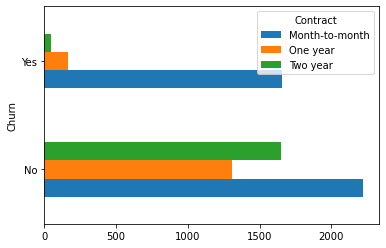

In [121]:
df['COUNT']=1
df.pivot_table(index='Churn',columns='Contract',values='COUNT',aggfunc='sum').plot(kind='barh')


<AxesSubplot:xlabel='Churn'>

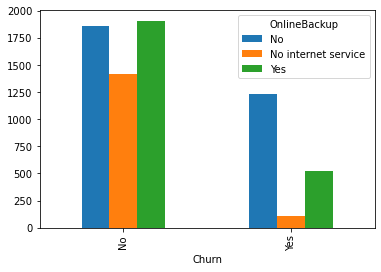

In [122]:
df.pivot_table(index='Churn',columns='OnlineBackup',values='COUNT',aggfunc='sum').plot(kind='bar')

<AxesSubplot:xlabel='Churn'>

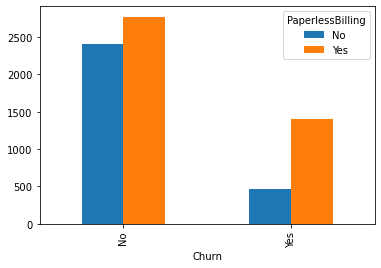

In [123]:
df.pivot_table(index='Churn',columns='PaperlessBilling',values='COUNT',aggfunc='sum').plot(kind='bar')

<AxesSubplot:ylabel='Churn'>

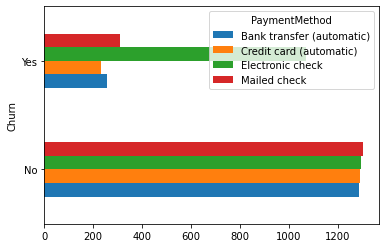

In [124]:
df.pivot_table(index='Churn',columns='PaymentMethod',values='COUNT',aggfunc='sum').plot(kind='barh')

<AxesSubplot:>

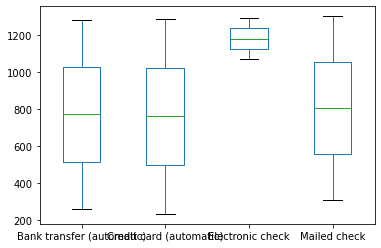

In [125]:
df.pivot_table(index='Churn',columns='PaymentMethod',values='COUNT',aggfunc='sum').plot(kind='box')

<AxesSubplot:ylabel='Churn'>

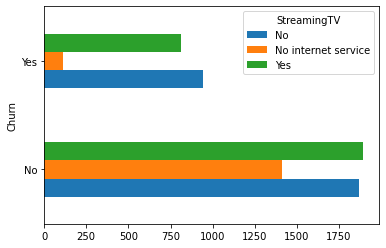

In [126]:
df['COUNT'] = 1
df.pivot_table( index = 'Churn' , columns = 'StreamingTV' , values = 'COUNT', aggfunc = 'sum').plot(kind='barh')

<AxesSubplot:>

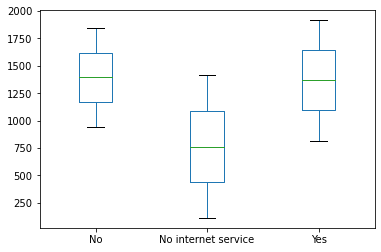

In [127]:
df['COUNT'] = 1
df.pivot_table( index = 'Churn' , columns = 'StreamingMovies' , values = 'COUNT', aggfunc = 'sum').plot(kind='box')

<AxesSubplot:ylabel='Churn'>

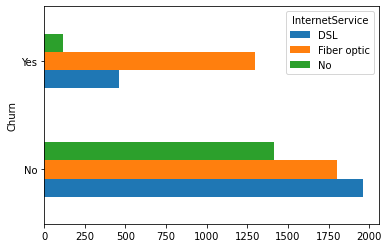

In [128]:
df['COUNT'] = 1
df.pivot_table( index = 'Churn' , columns = 'InternetService' , values = 'COUNT', aggfunc = 'sum').plot(kind='barh')

<AxesSubplot:ylabel='Churn'>

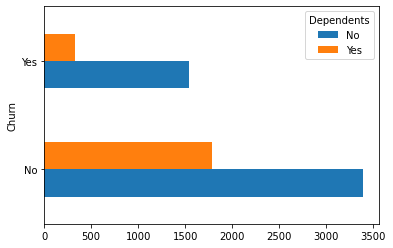

In [129]:
df['COUNT'] = 1
df.pivot_table( index = 'Churn' , columns = 'Dependents' , values = 'COUNT', aggfunc = 'sum').plot(kind='barh')

<AxesSubplot:ylabel='Churn'>

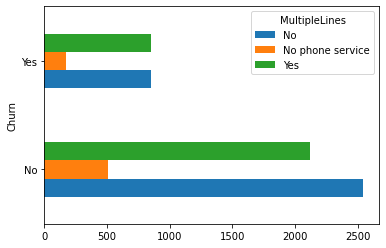

In [130]:
df['COUNT'] = 1
df.pivot_table( index = 'Churn' , columns = 'MultipleLines' , values = 'COUNT', aggfunc = 'sum').plot(kind='barh')

<AxesSubplot:ylabel='Churn'>

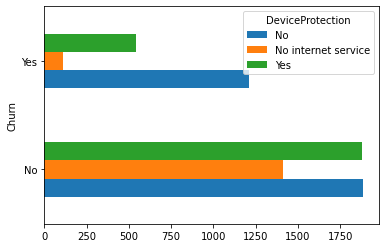

In [131]:
df['COUNT'] = 1
df.pivot_table( index = 'Churn' , columns = 'DeviceProtection' , values = 'COUNT', aggfunc = 'sum').plot(kind='barh')

In [132]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'COUNT'],
      dtype='object')

### Pie Chart

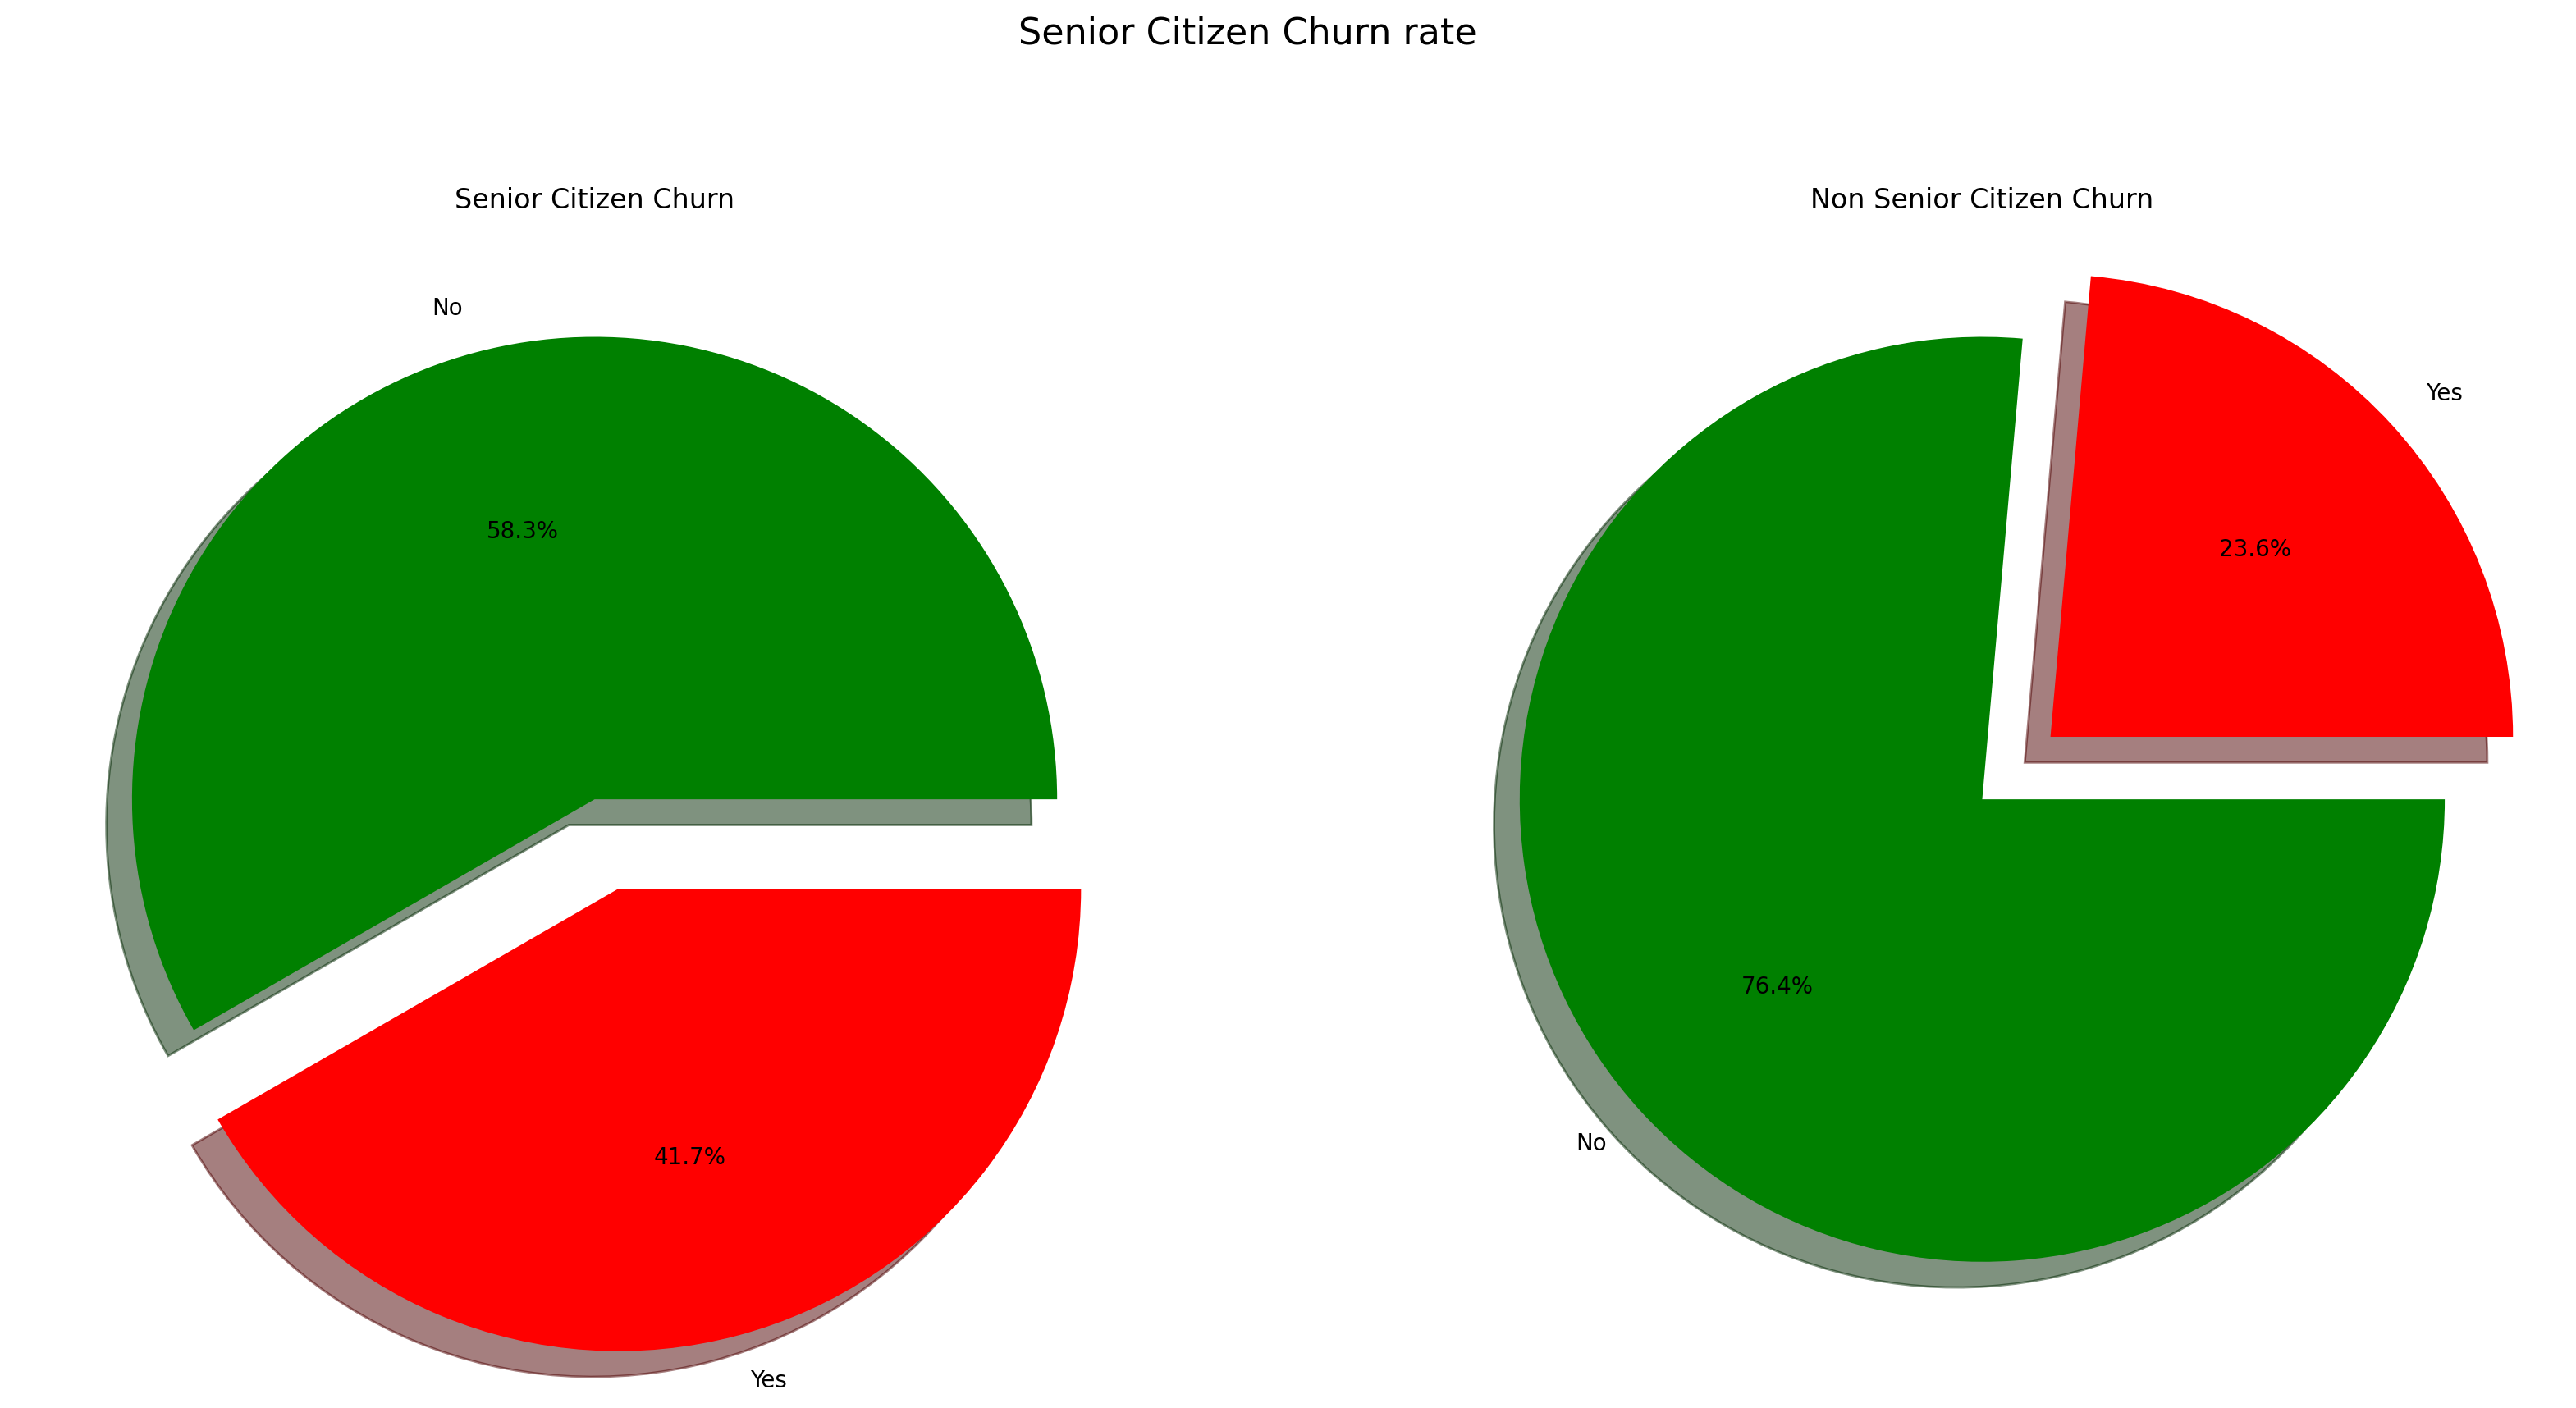

In [133]:
df['COUNT'] = 1
table=df.pivot_table( index = 'Churn' , columns = 'SeniorCitizen' , values = 'COUNT', aggfunc = 'sum')
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10) , dpi = 200)

fig.suptitle('Senior Citizen Churn rate', fontsize=16 )
# axs[0].plot -> Line plot
axs[0].pie(table['yes'].values, colors=['g','r'],
           labels=table['yes'].index ,
           autopct='%0.1f%%',
counterclock=True, shadow=True,explode=(0.0,0.2))
axs[0].set_title('Senior Citizen Churn')

axs[1].pie(table['no'].values, colors=['g','r'],
           labels=table['no'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=True,explode=(0.0,0.2))
axs[1].set_title('Non Senior Citizen Churn')

plt.show()

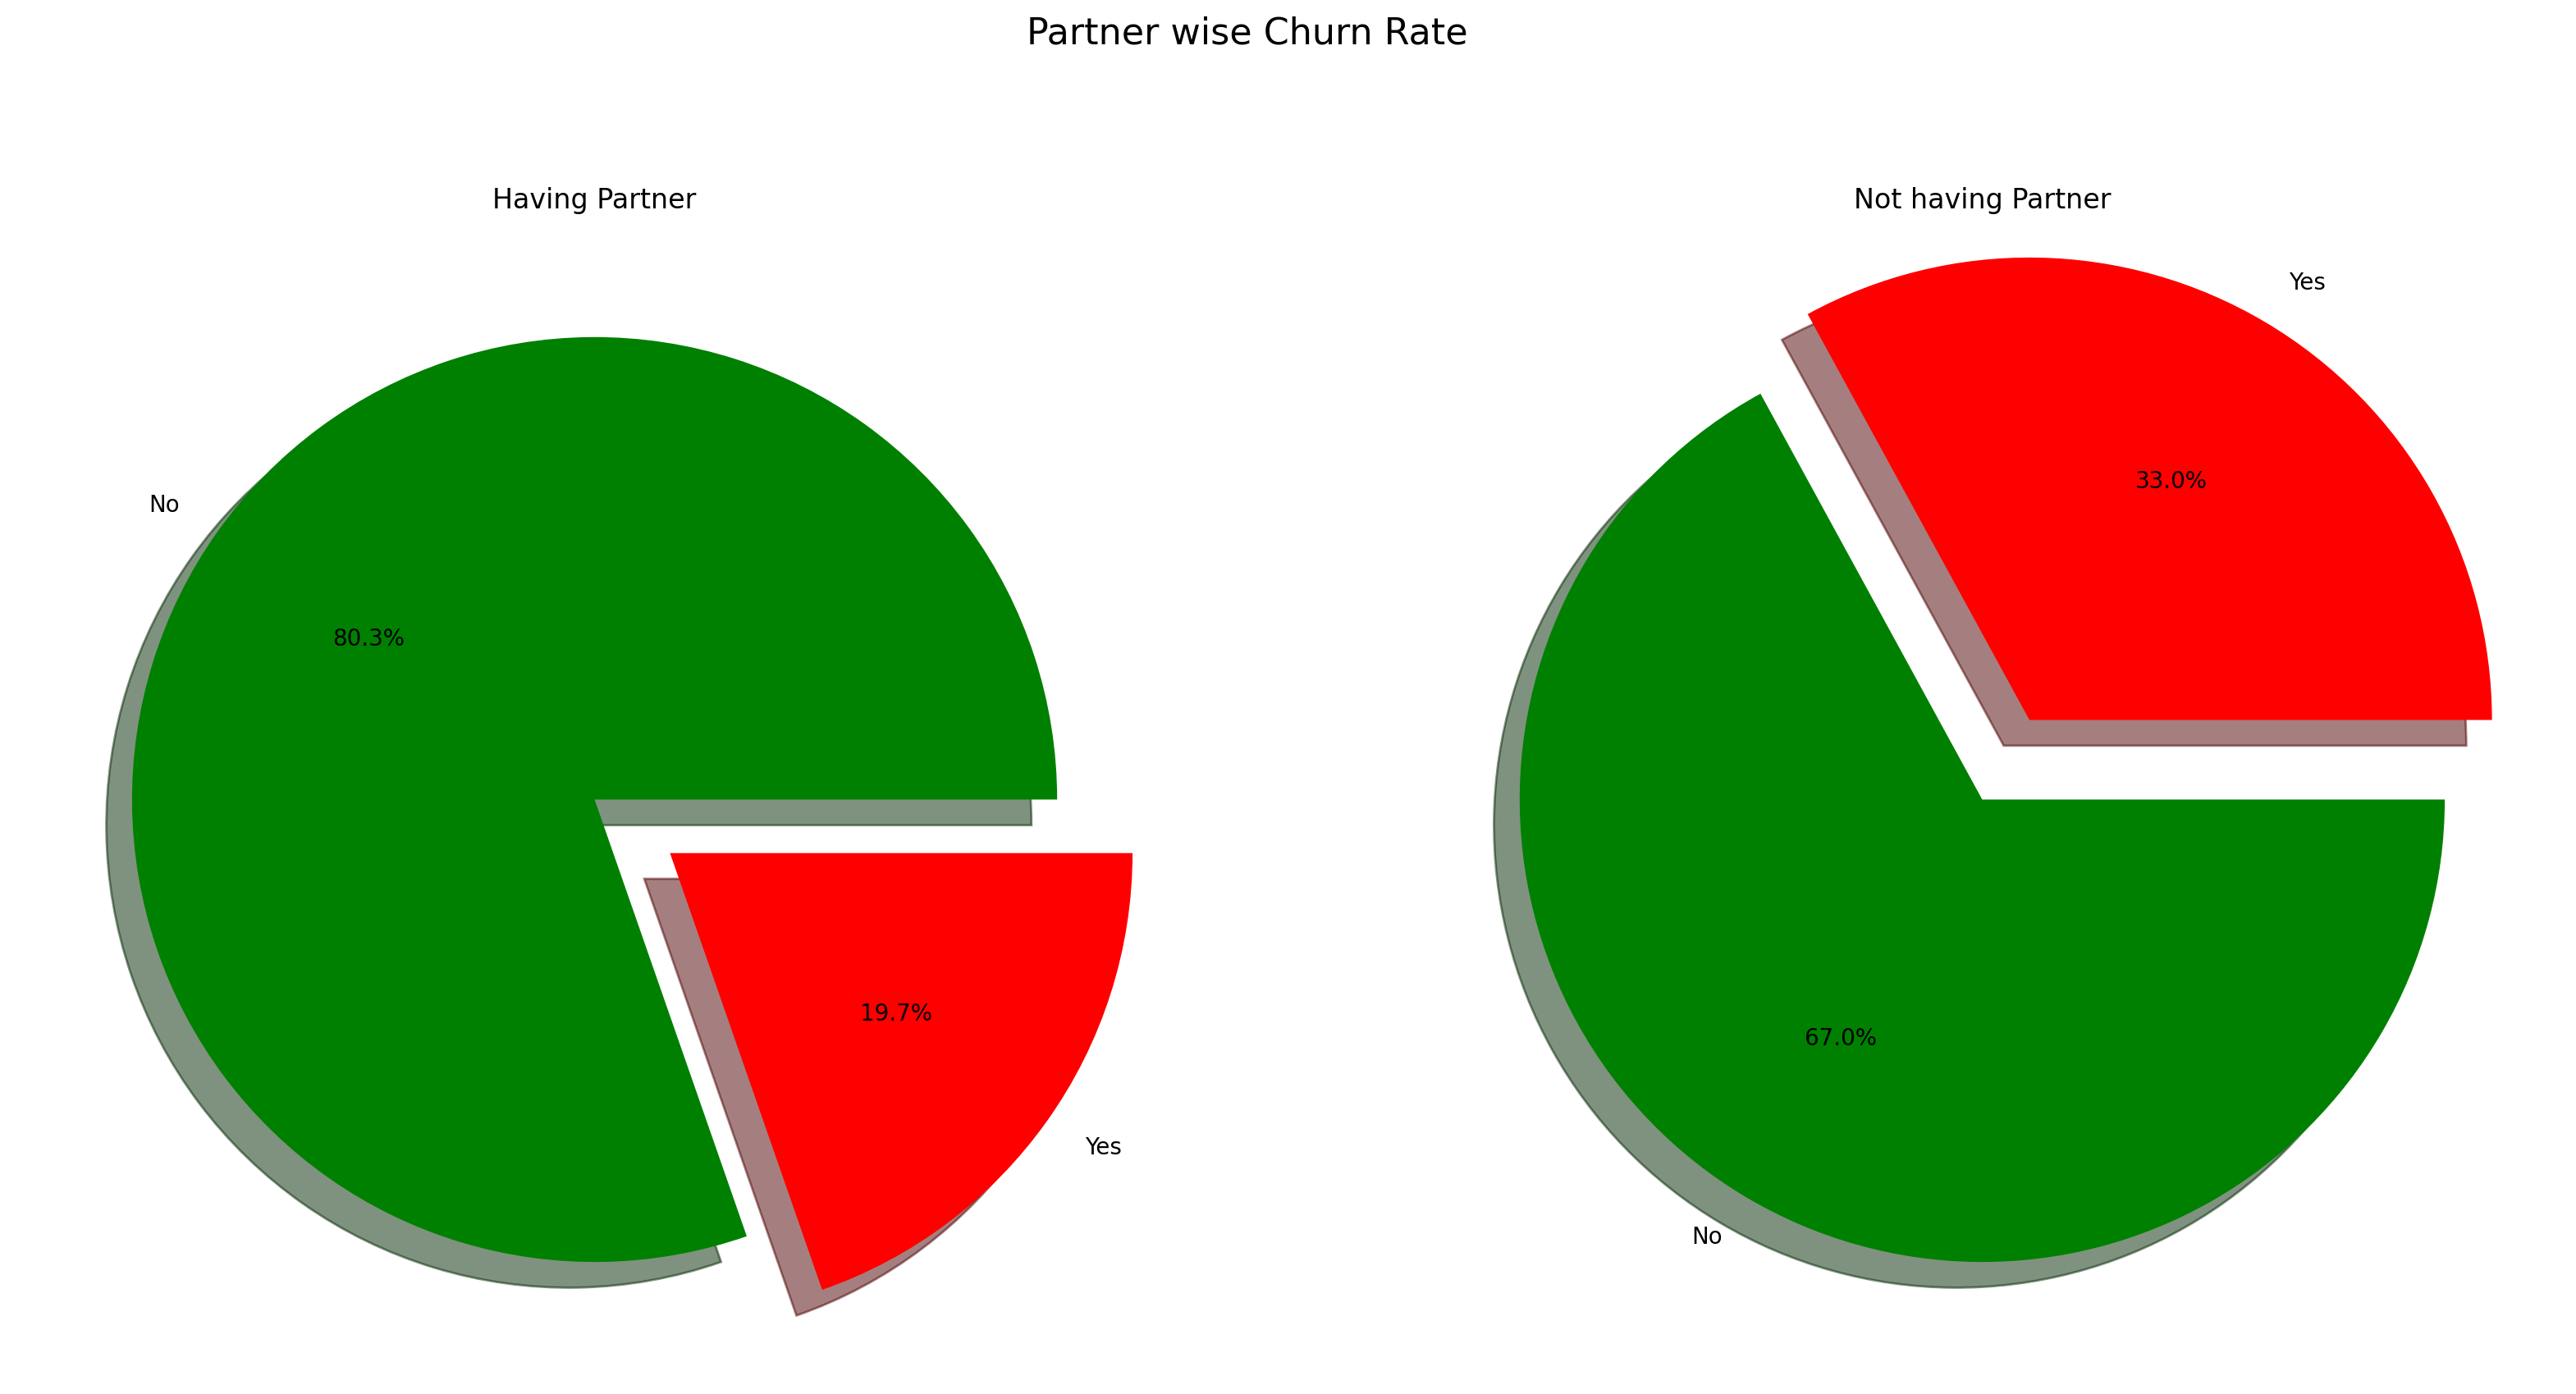

In [134]:
df['COUNT'] = 1
table=df.pivot_table( index = 'Churn' , columns = 'Partner' , values = 'COUNT', aggfunc = 'sum')
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10) , dpi = 200)

fig.suptitle('Partner wise Churn Rate', fontsize=16 )
# axs[0].plot -> Line plot
axs[0].pie(table['Yes'].values, colors=['g','r'],
           labels=table['Yes'].index ,
           autopct='%0.1f%%',
counterclock=True, shadow=True,explode=(0.0,0.2))
axs[0].set_title('Having Partner')

axs[1].pie(table['No'].values, colors=['g','r'],
           labels=table['No'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=True,explode=(0.0,0.2))
axs[1].set_title('Not having Partner')

plt.show()

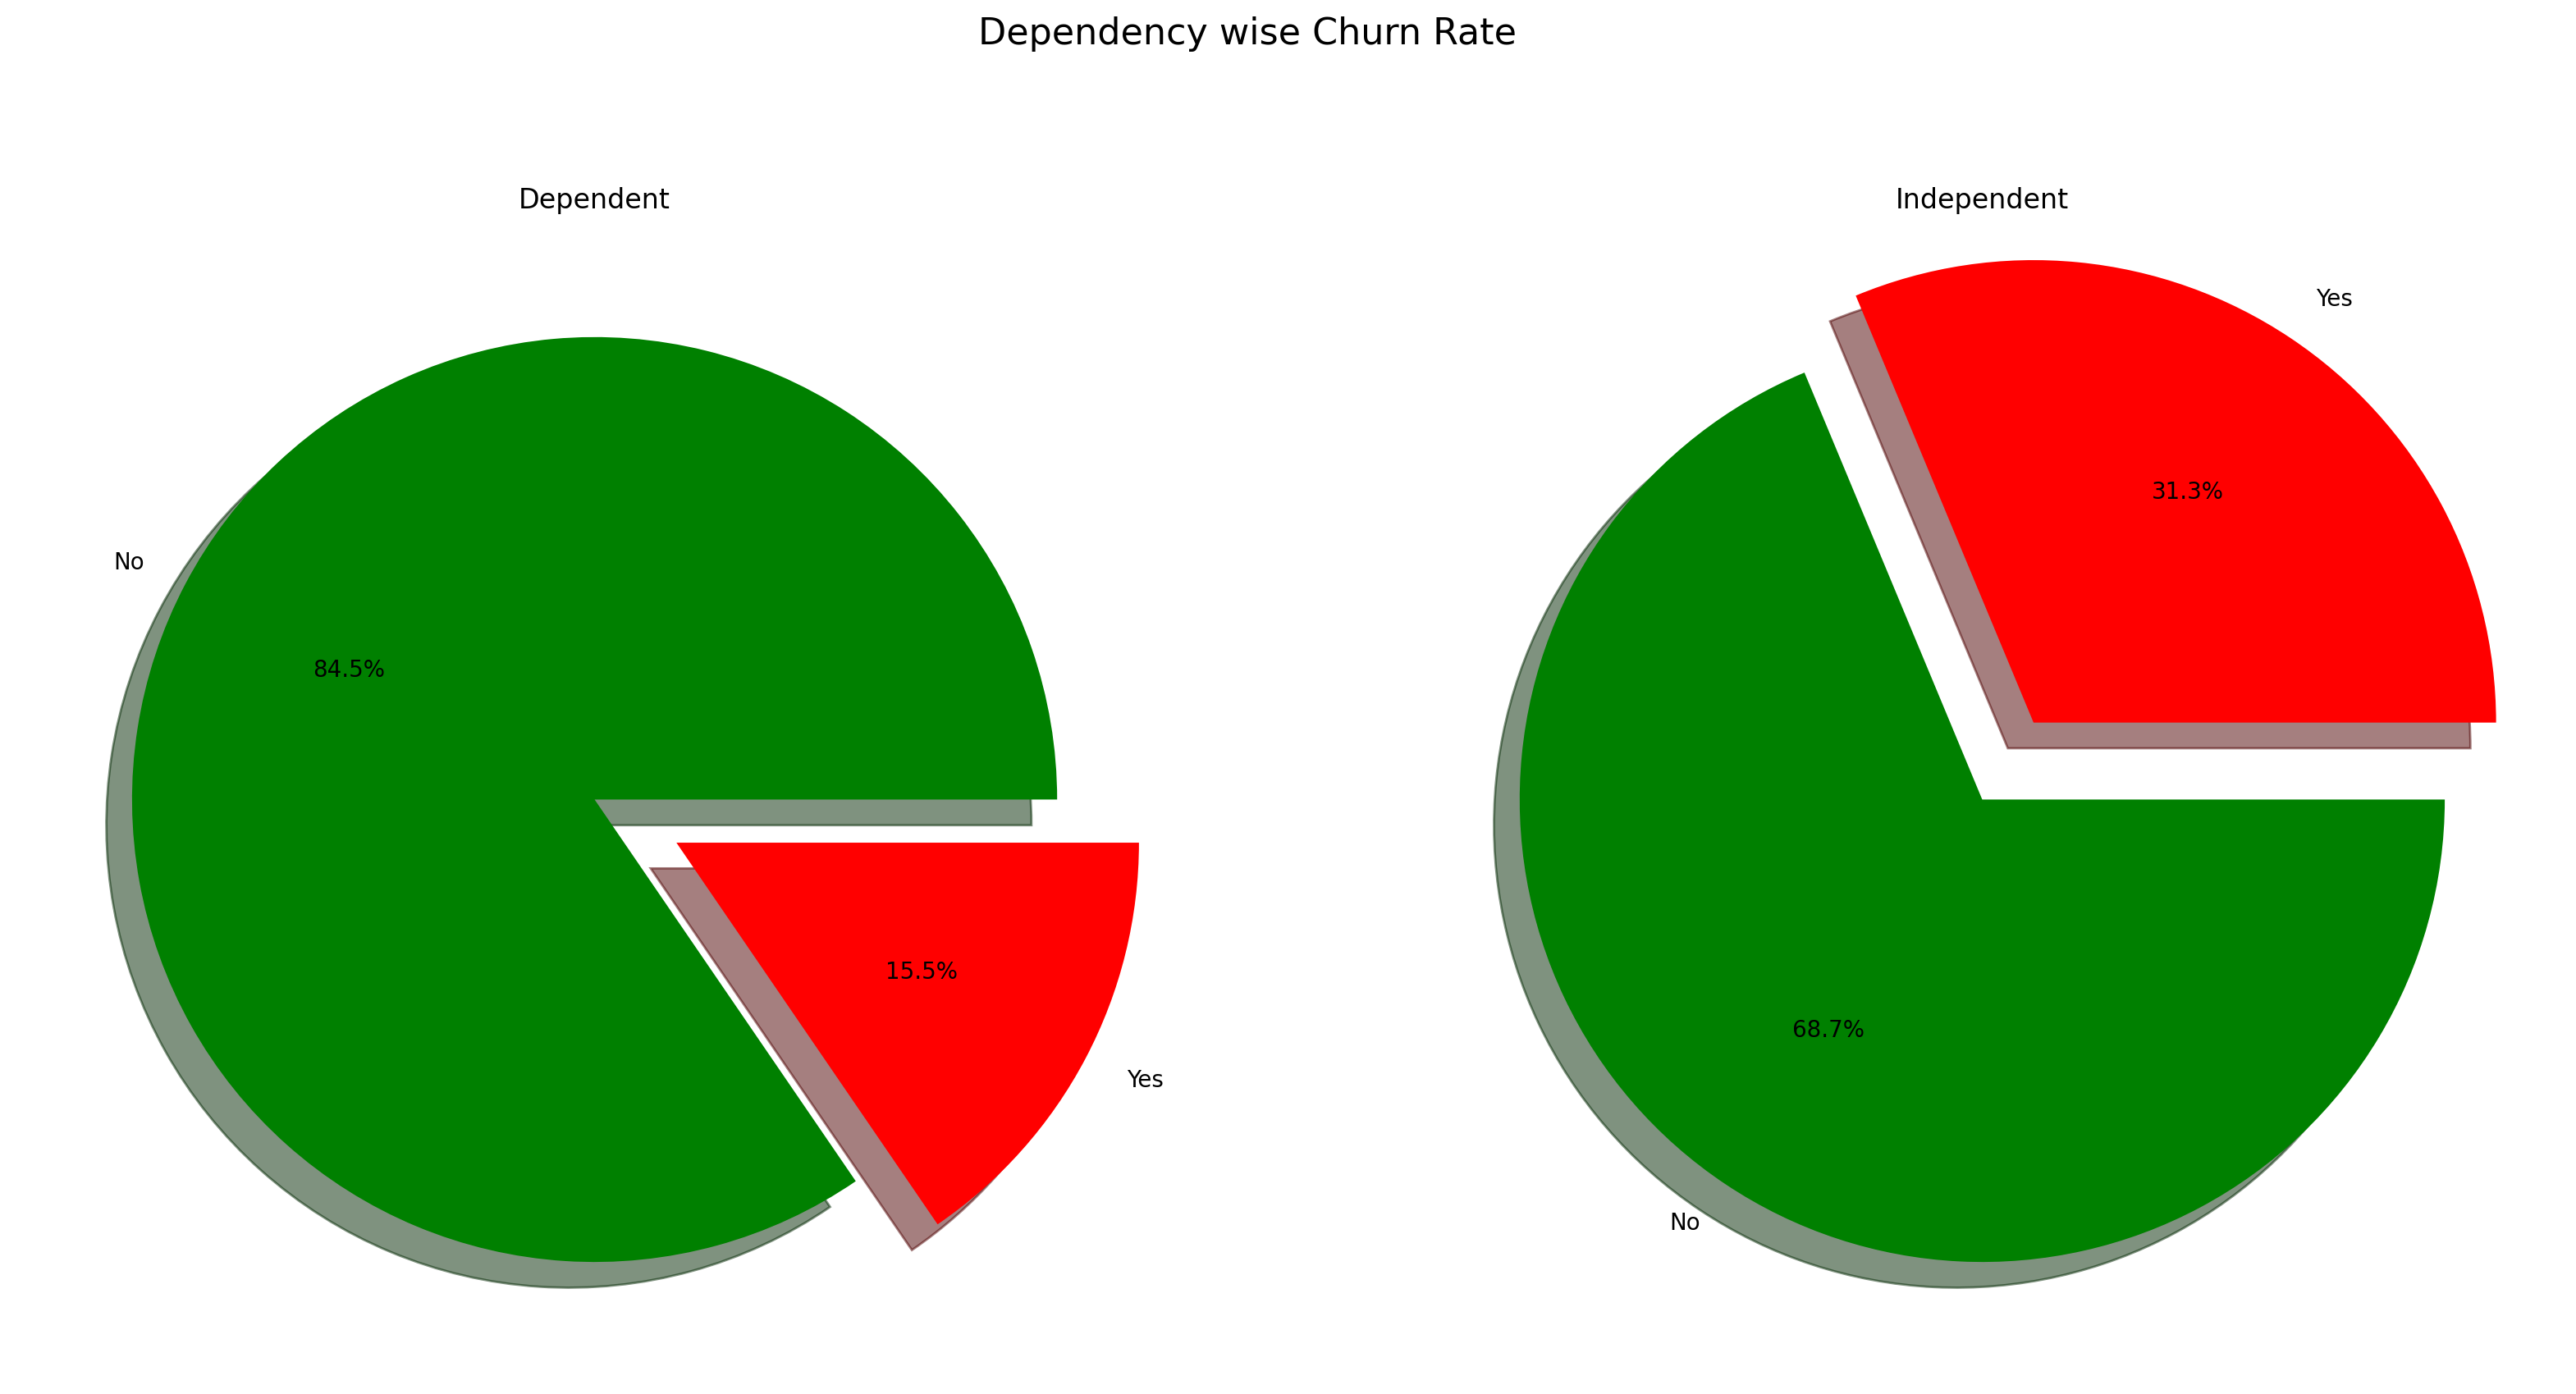

In [135]:
df['COUNT'] = 1
table=df.pivot_table( index = 'Churn' , columns = 'Dependents' , values = 'COUNT', aggfunc = 'sum')
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10) , dpi = 200)

fig.suptitle('Dependency wise Churn Rate', fontsize=16 )
# axs[0].plot -> Line plot
axs[0].pie(table['Yes'].values, colors=['g','r'],
           labels=table['Yes'].index ,
           autopct='%0.1f%%',
counterclock=True, shadow=True,explode=(0.0,0.2))
axs[0].set_title('Dependent')

axs[1].pie(table['No'].values, colors=['g','r'],
           labels=table['No'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=True,explode=(0.0,0.2))
axs[1].set_title('Independent')

plt.show()

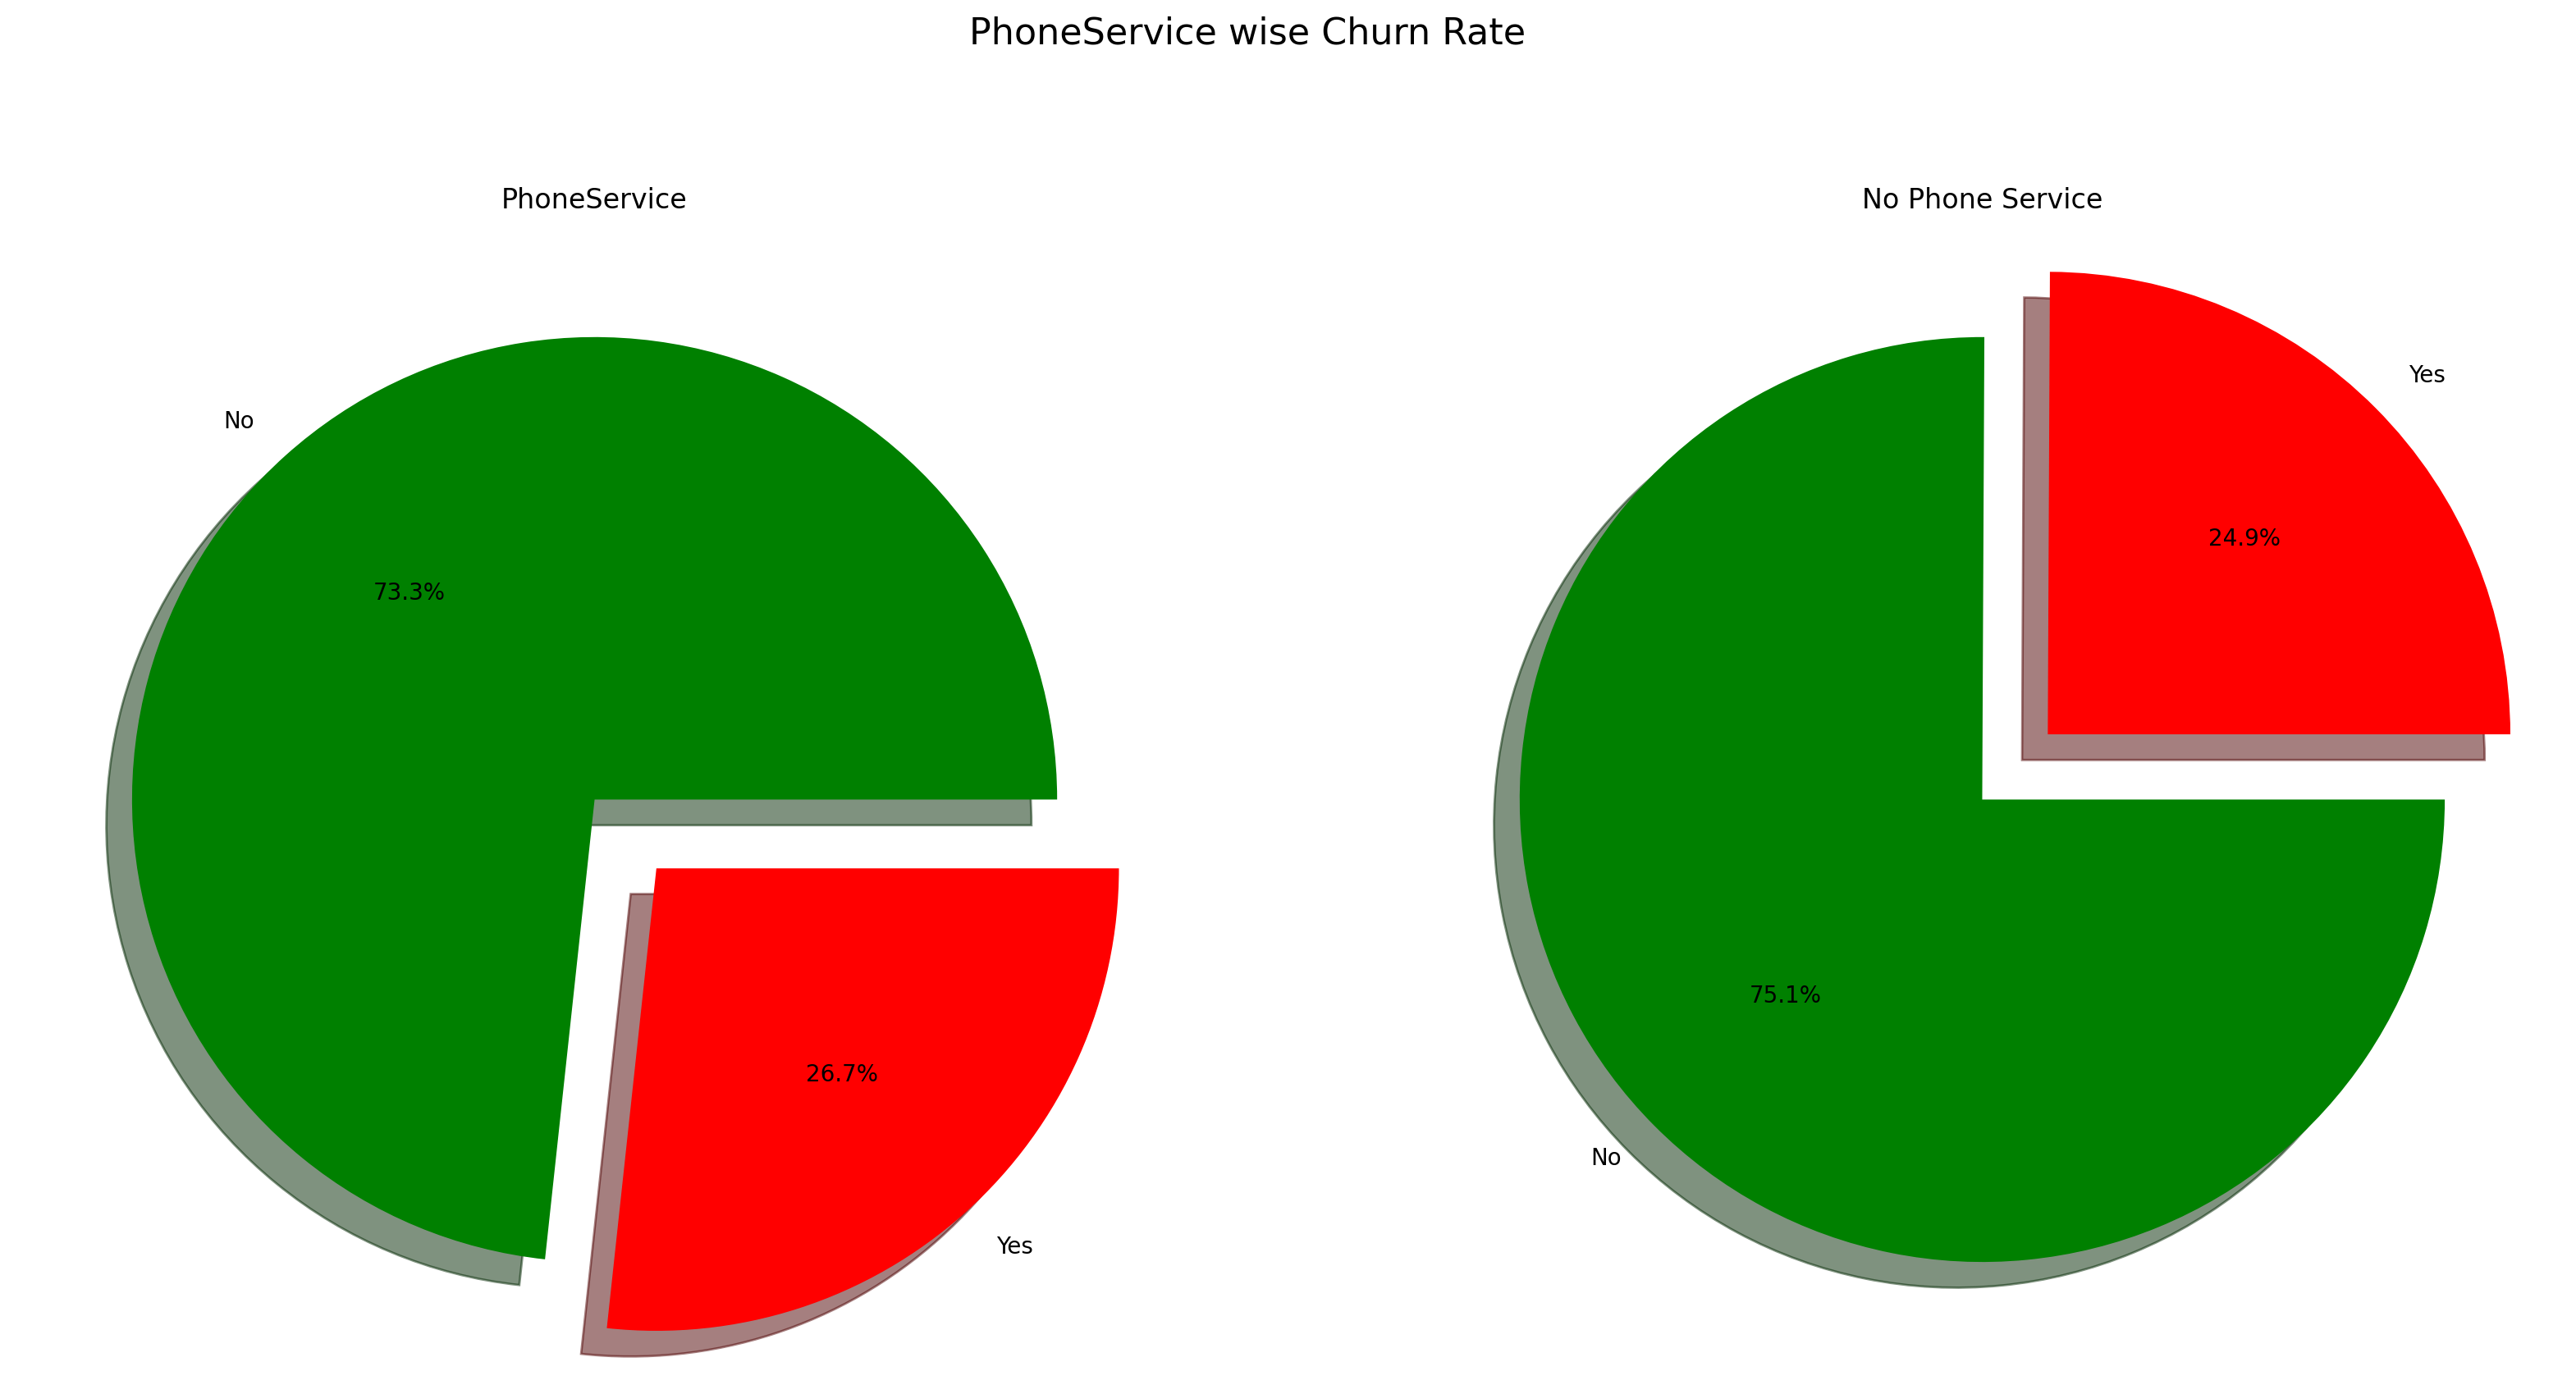

In [136]:
df['COUNT'] = 1
table=df.pivot_table( index = 'Churn' , columns = 'PhoneService' , values = 'COUNT', aggfunc = 'sum')
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10) , dpi = 200)

fig.suptitle('PhoneService wise Churn Rate', fontsize=16 )
# axs[0].plot -> Line plot
axs[0].pie(table['Yes'].values, colors=['g','r'],
           labels=table['Yes'].index ,
           autopct='%0.1f%%',
counterclock=True, shadow=True,explode=(0.0,0.2))
axs[0].set_title('PhoneService')

axs[1].pie(table['No'].values, colors=['g','r'],
           labels=table['No'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=True,explode=(0.0,0.2))
axs[1].set_title('No Phone Service')

plt.show()

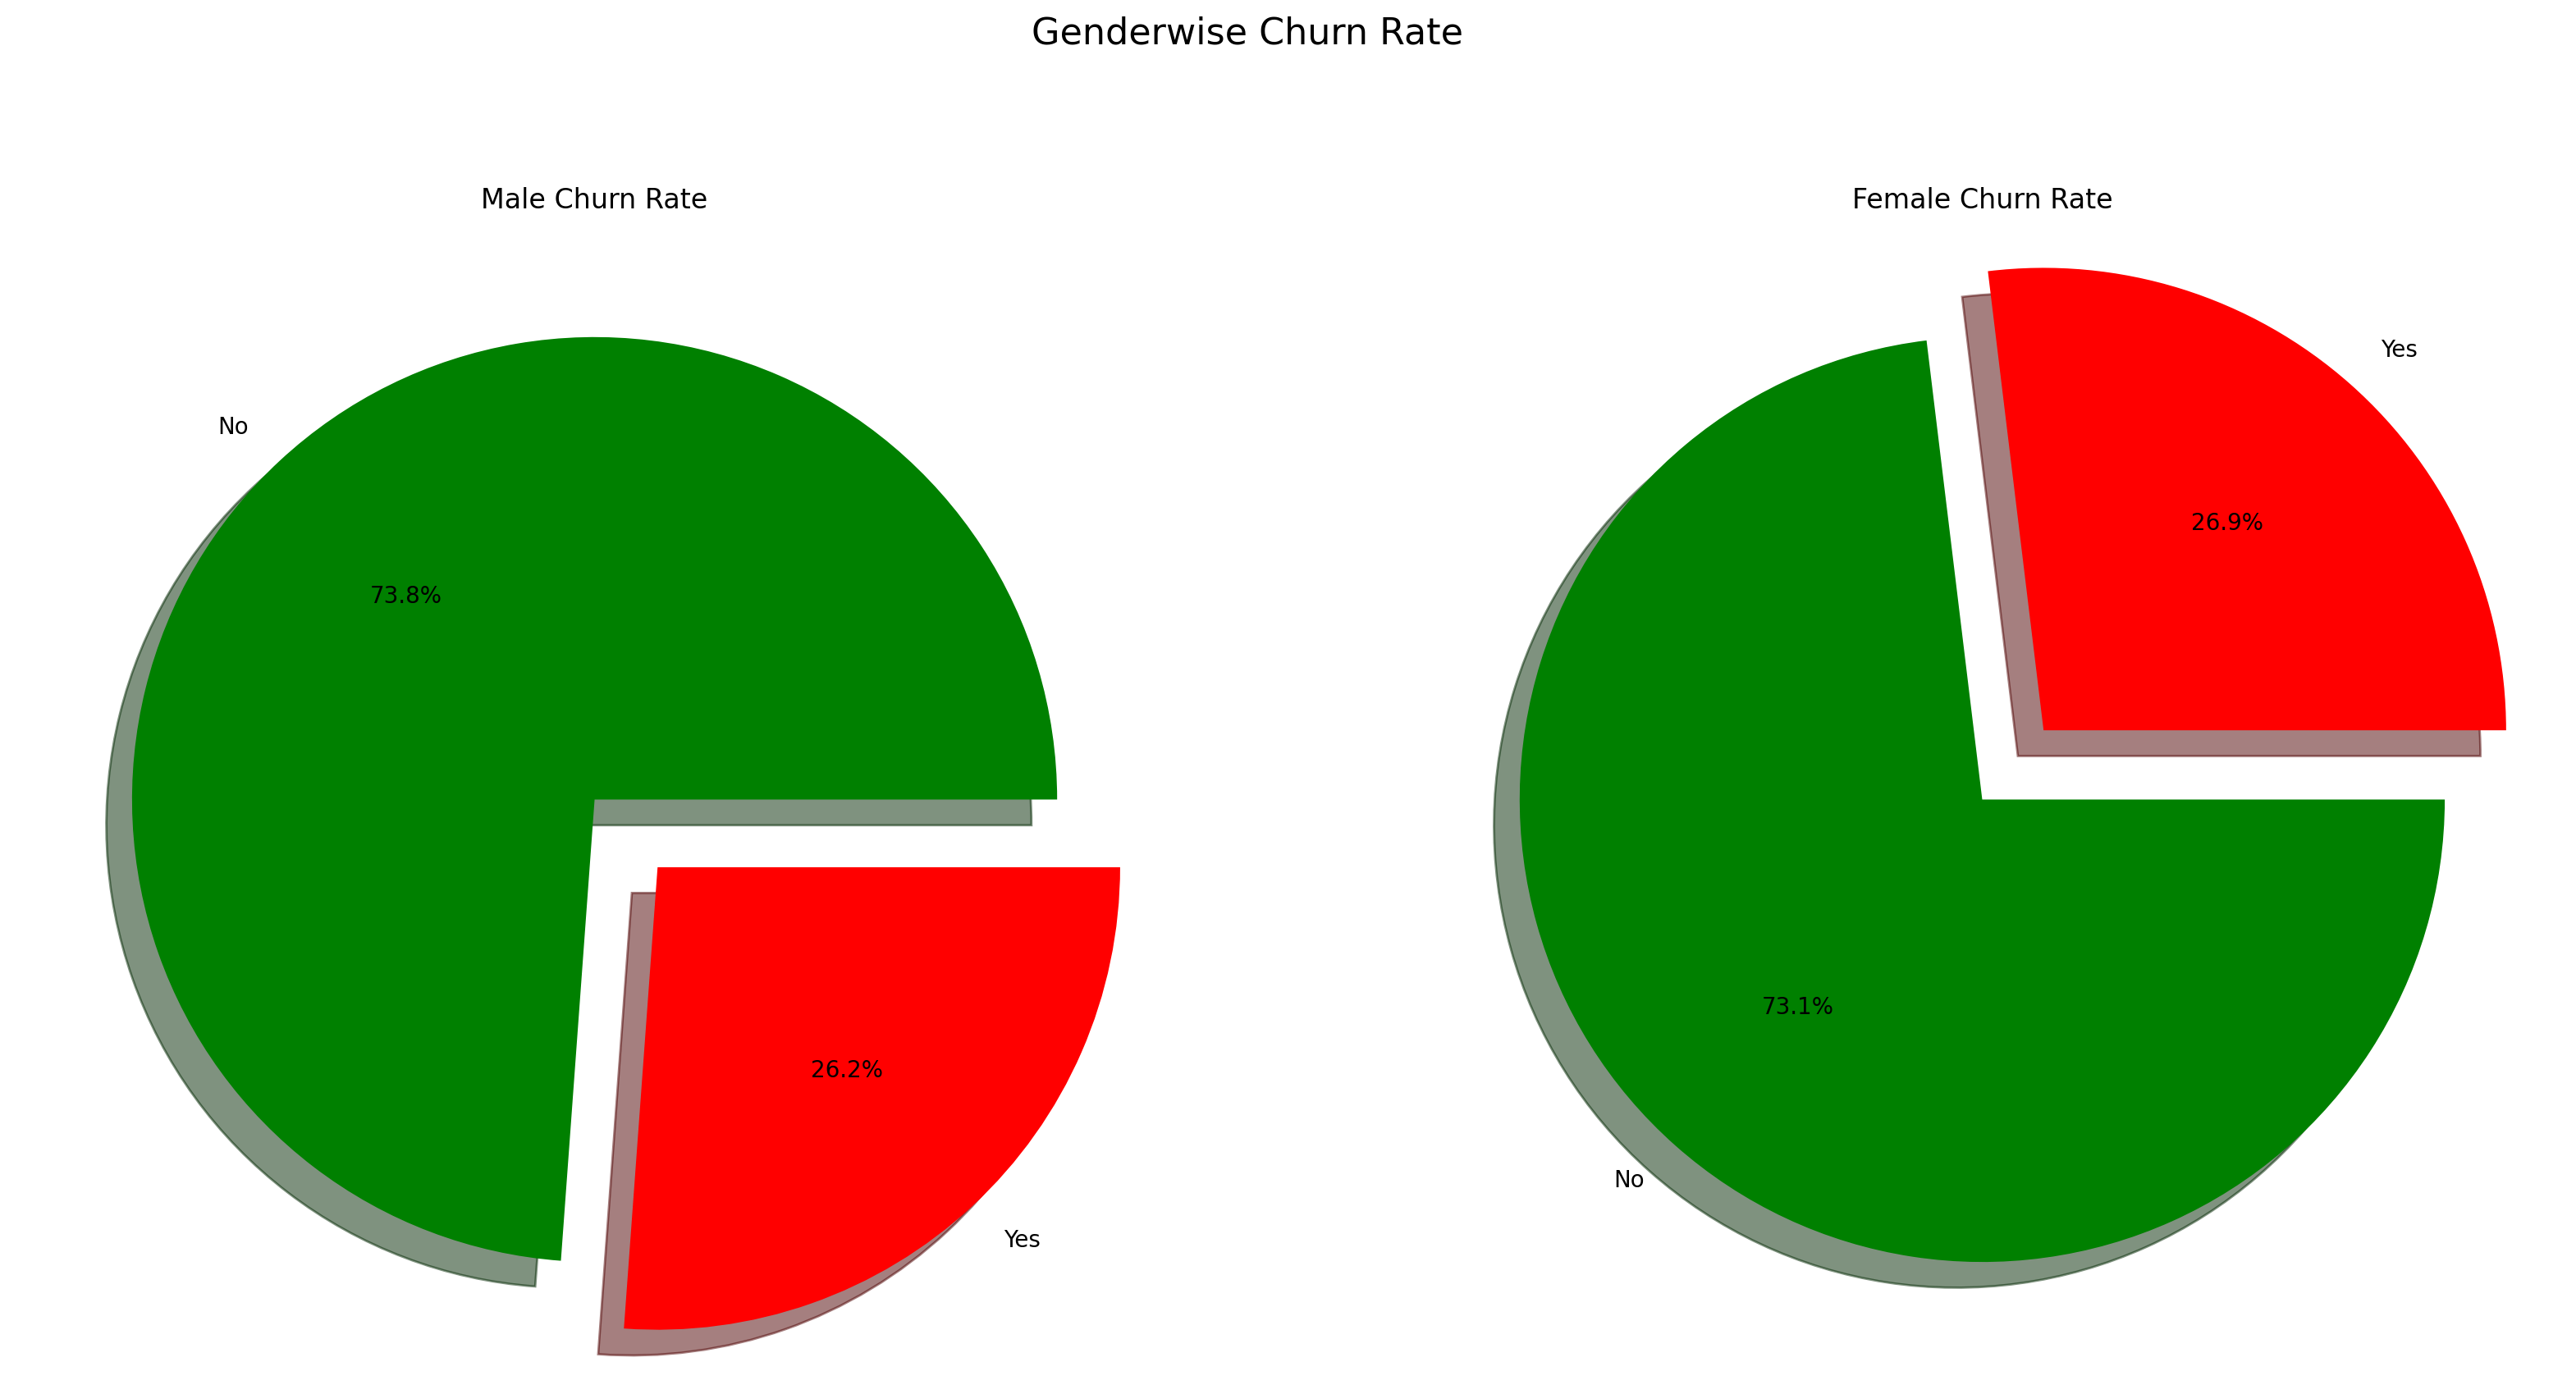

In [137]:
df['COUNT'] = 1
table=df.pivot_table( index = 'Churn' , columns = 'gender' , values = 'COUNT', aggfunc = 'sum')
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10) , dpi = 200)

fig.suptitle('Genderwise Churn Rate', fontsize=16 )
# axs[0].plot -> Line plot
axs[0].pie(table['Male'].values, colors=['g','r'],
           labels=table['Male'].index ,
           autopct='%0.1f%%',
counterclock=True, shadow=True,explode=(0.0,0.2))
axs[0].set_title('Male Churn Rate')

axs[1].pie(table['Female'].values, colors=['g','r'],
           labels=table['Female'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=True,explode=(0.0,0.2))
axs[1].set_title('Female Churn Rate')

plt.show()

In [138]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'COUNT'],
      dtype='object')

In [139]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

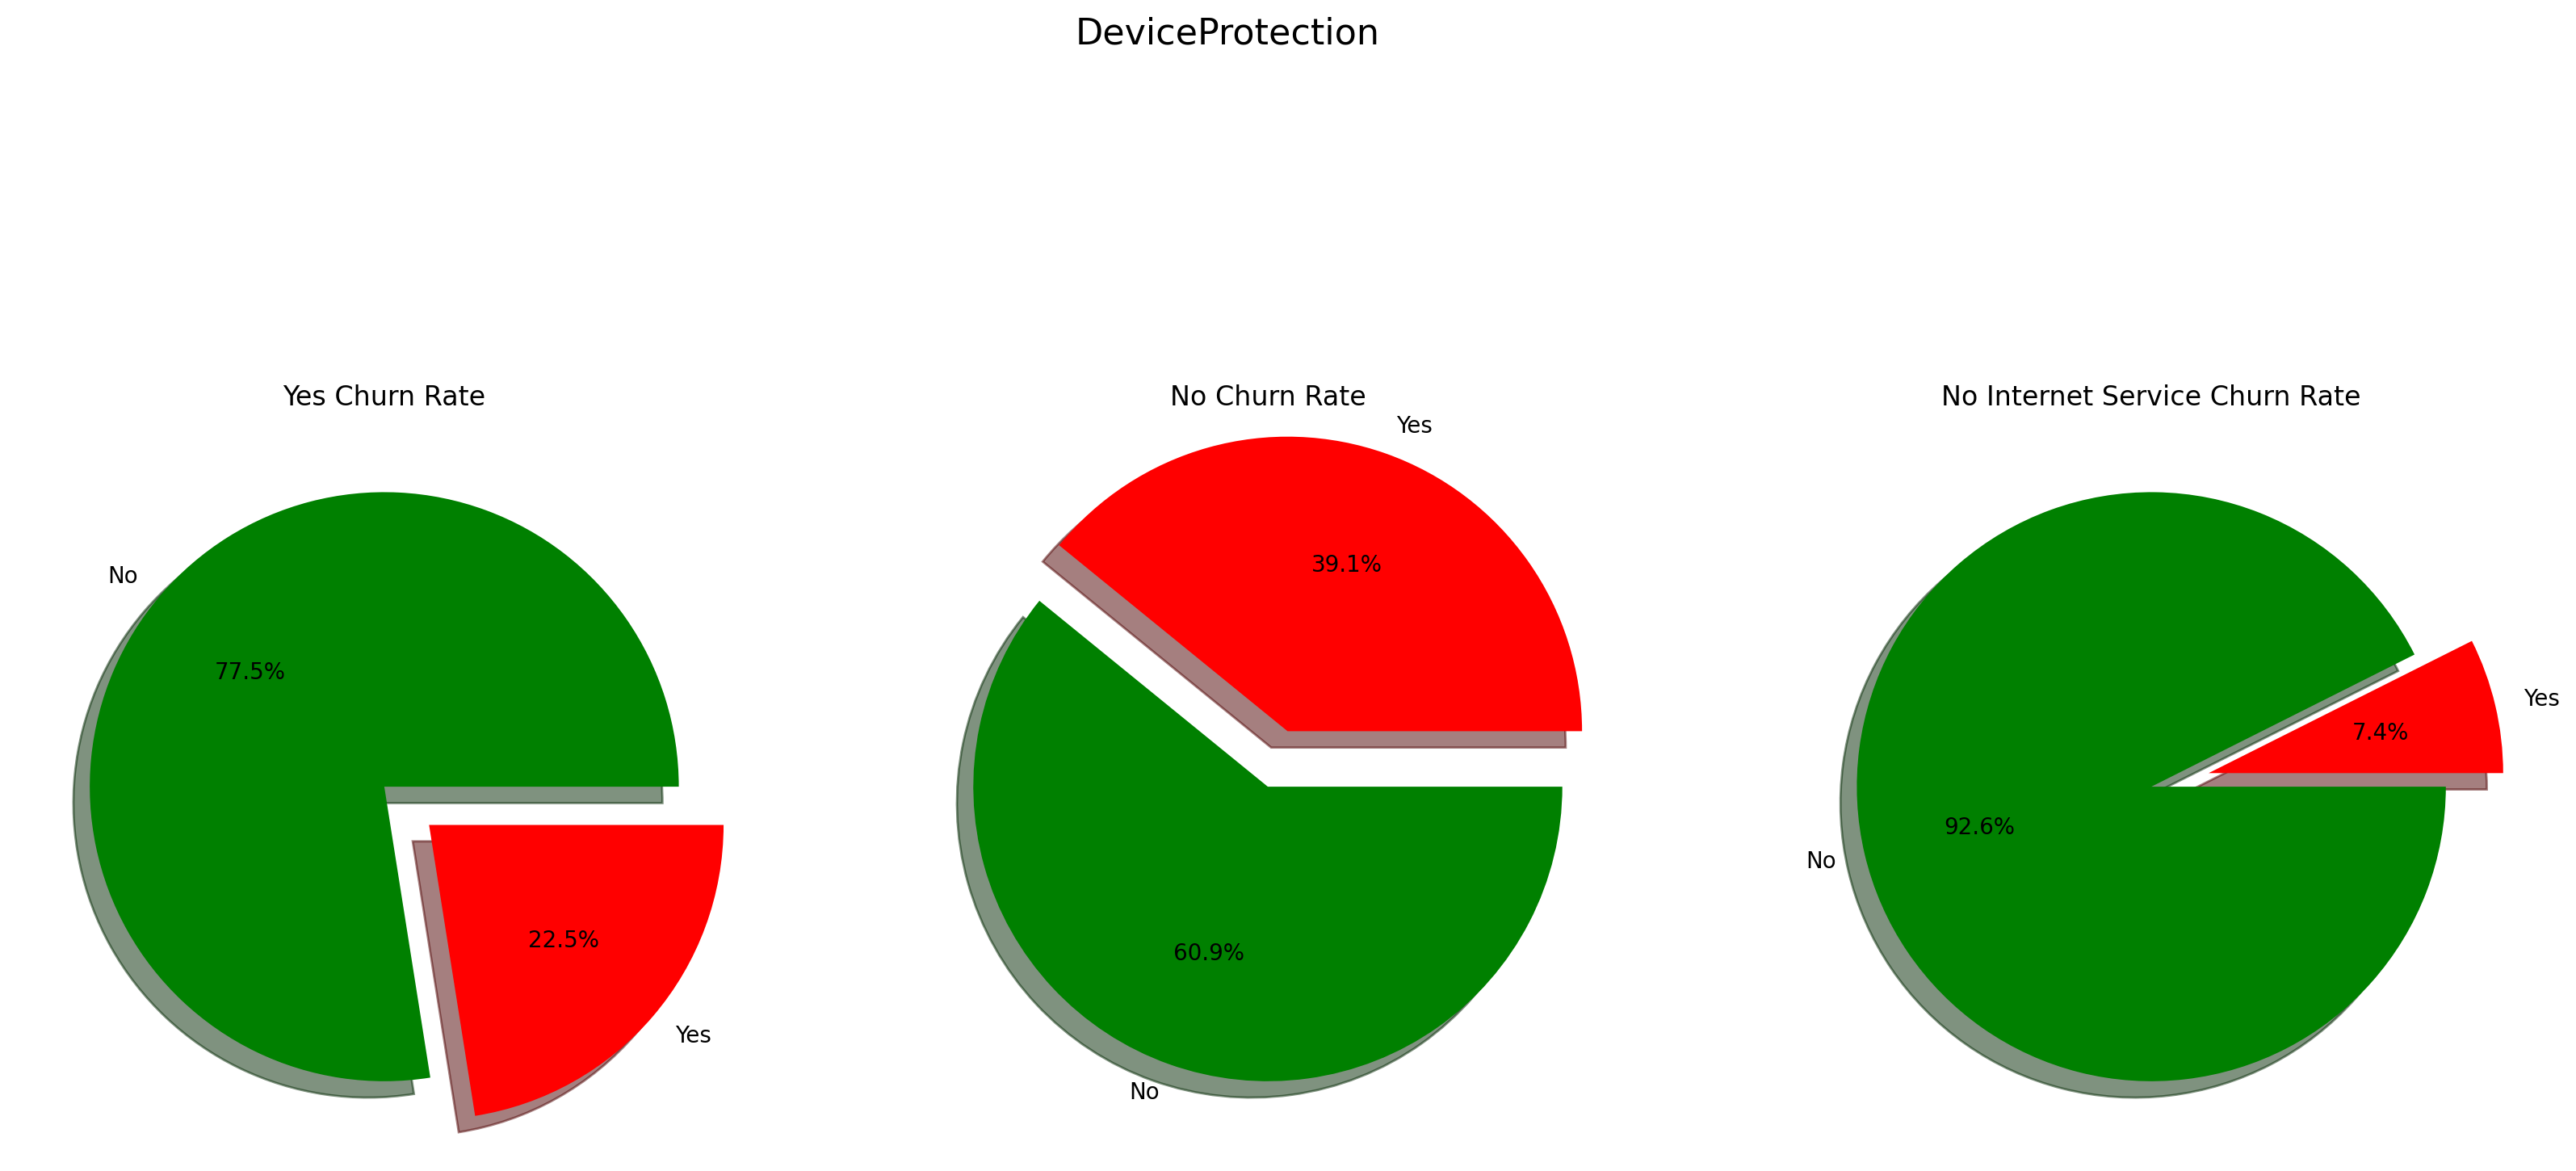

In [140]:
df['COUNT'] = 1
table=df.pivot_table( index = 'Churn' , columns = 'DeviceProtection' , values = 'COUNT', aggfunc = 'sum')
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 10) , dpi = 200)

fig.suptitle('DeviceProtection', fontsize=16 )
# axs[0].plot -> Line plot
axs[0].pie(table['Yes'].values, colors=['g','r'],
           labels=table['Yes'].index ,
           autopct='%0.1f%%',
counterclock=True, shadow=True,explode=(0.0,0.2))
axs[0].set_title('Yes Churn Rate')

axs[1].pie(table['No'].values, colors=['g','r'],
           labels=table['No'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=True,explode=(0.0,0.2))
axs[1].set_title('No Churn Rate')

axs[2].pie(table['No internet service'].values, colors=['g','r'],
           labels=table['No internet service'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=True,explode=(0.0,0.2))
axs[2].set_title('No Internet Service Churn Rate')

plt.show()

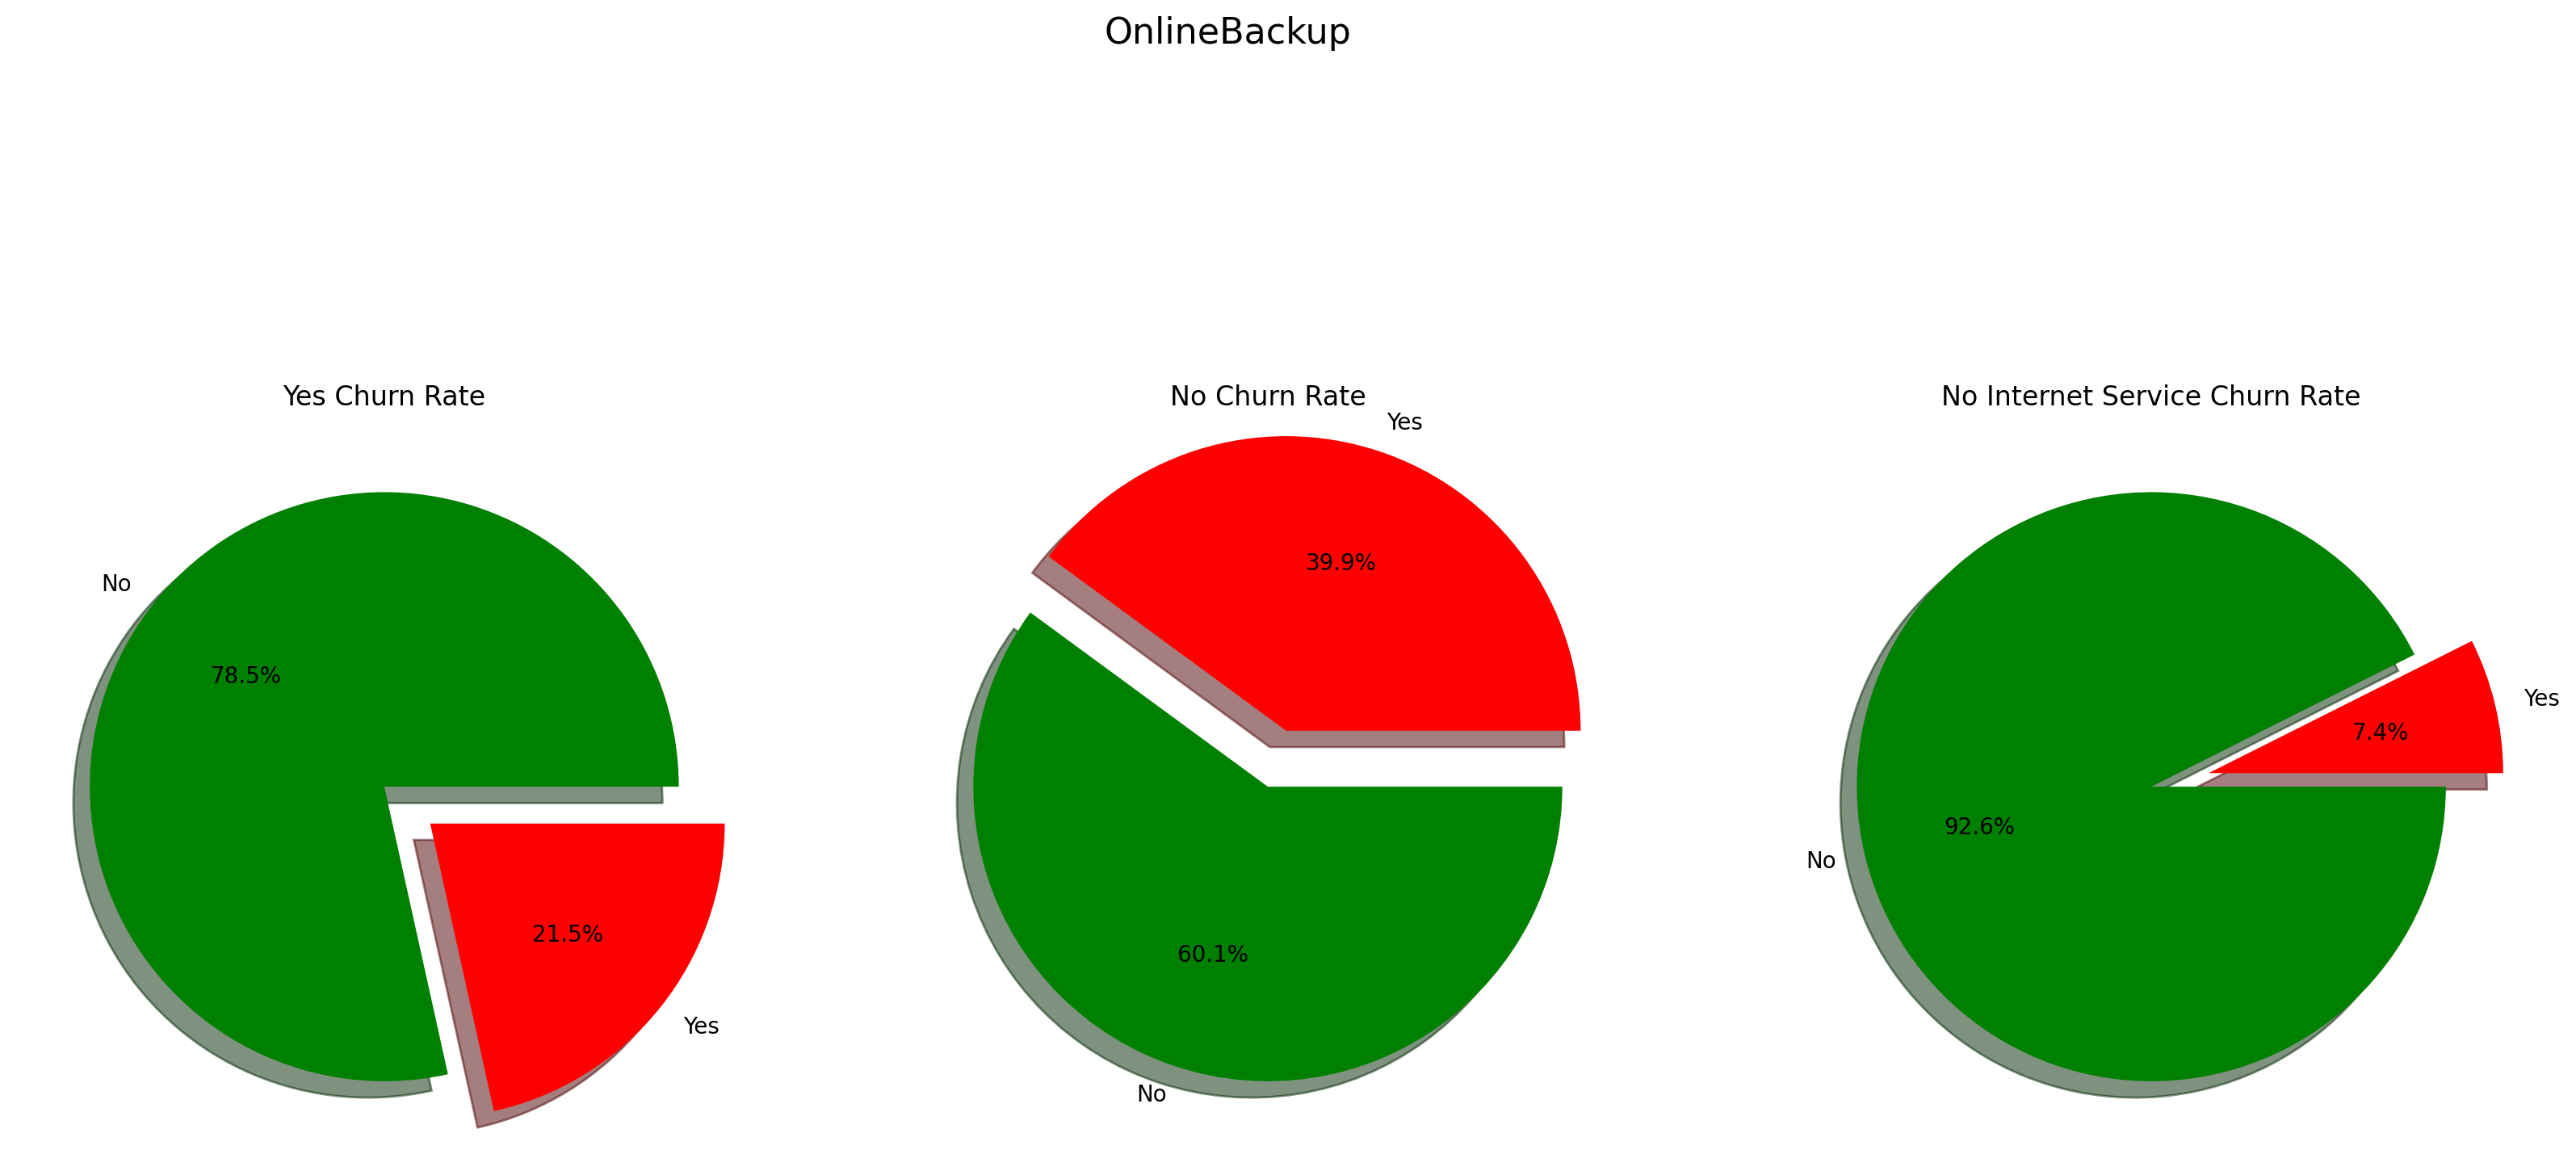

In [141]:
df['COUNT'] = 1
table=df.pivot_table( index = 'Churn' , columns = 'OnlineBackup' , values = 'COUNT', aggfunc = 'sum')
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 10) , dpi = 200)

fig.suptitle('OnlineBackup', fontsize=16 )
# axs[0].plot -> Line plot
axs[0].pie(table['Yes'].values, colors=['g','r'],
           labels=table['Yes'].index ,
           autopct='%0.1f%%',
counterclock=True, shadow=True,explode=(0.0,0.2))
axs[0].set_title('Yes Churn Rate')

axs[1].pie(table['No'].values, colors=['g','r'],
           labels=table['No'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=True,explode=(0.0,0.2))
axs[1].set_title('No Churn Rate')

axs[2].pie(table['No internet service'].values, colors=['g','r'],
           labels=table['No internet service'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=True,explode=(0.0,0.2))
axs[2].set_title('No Internet Service Churn Rate')

plt.show()

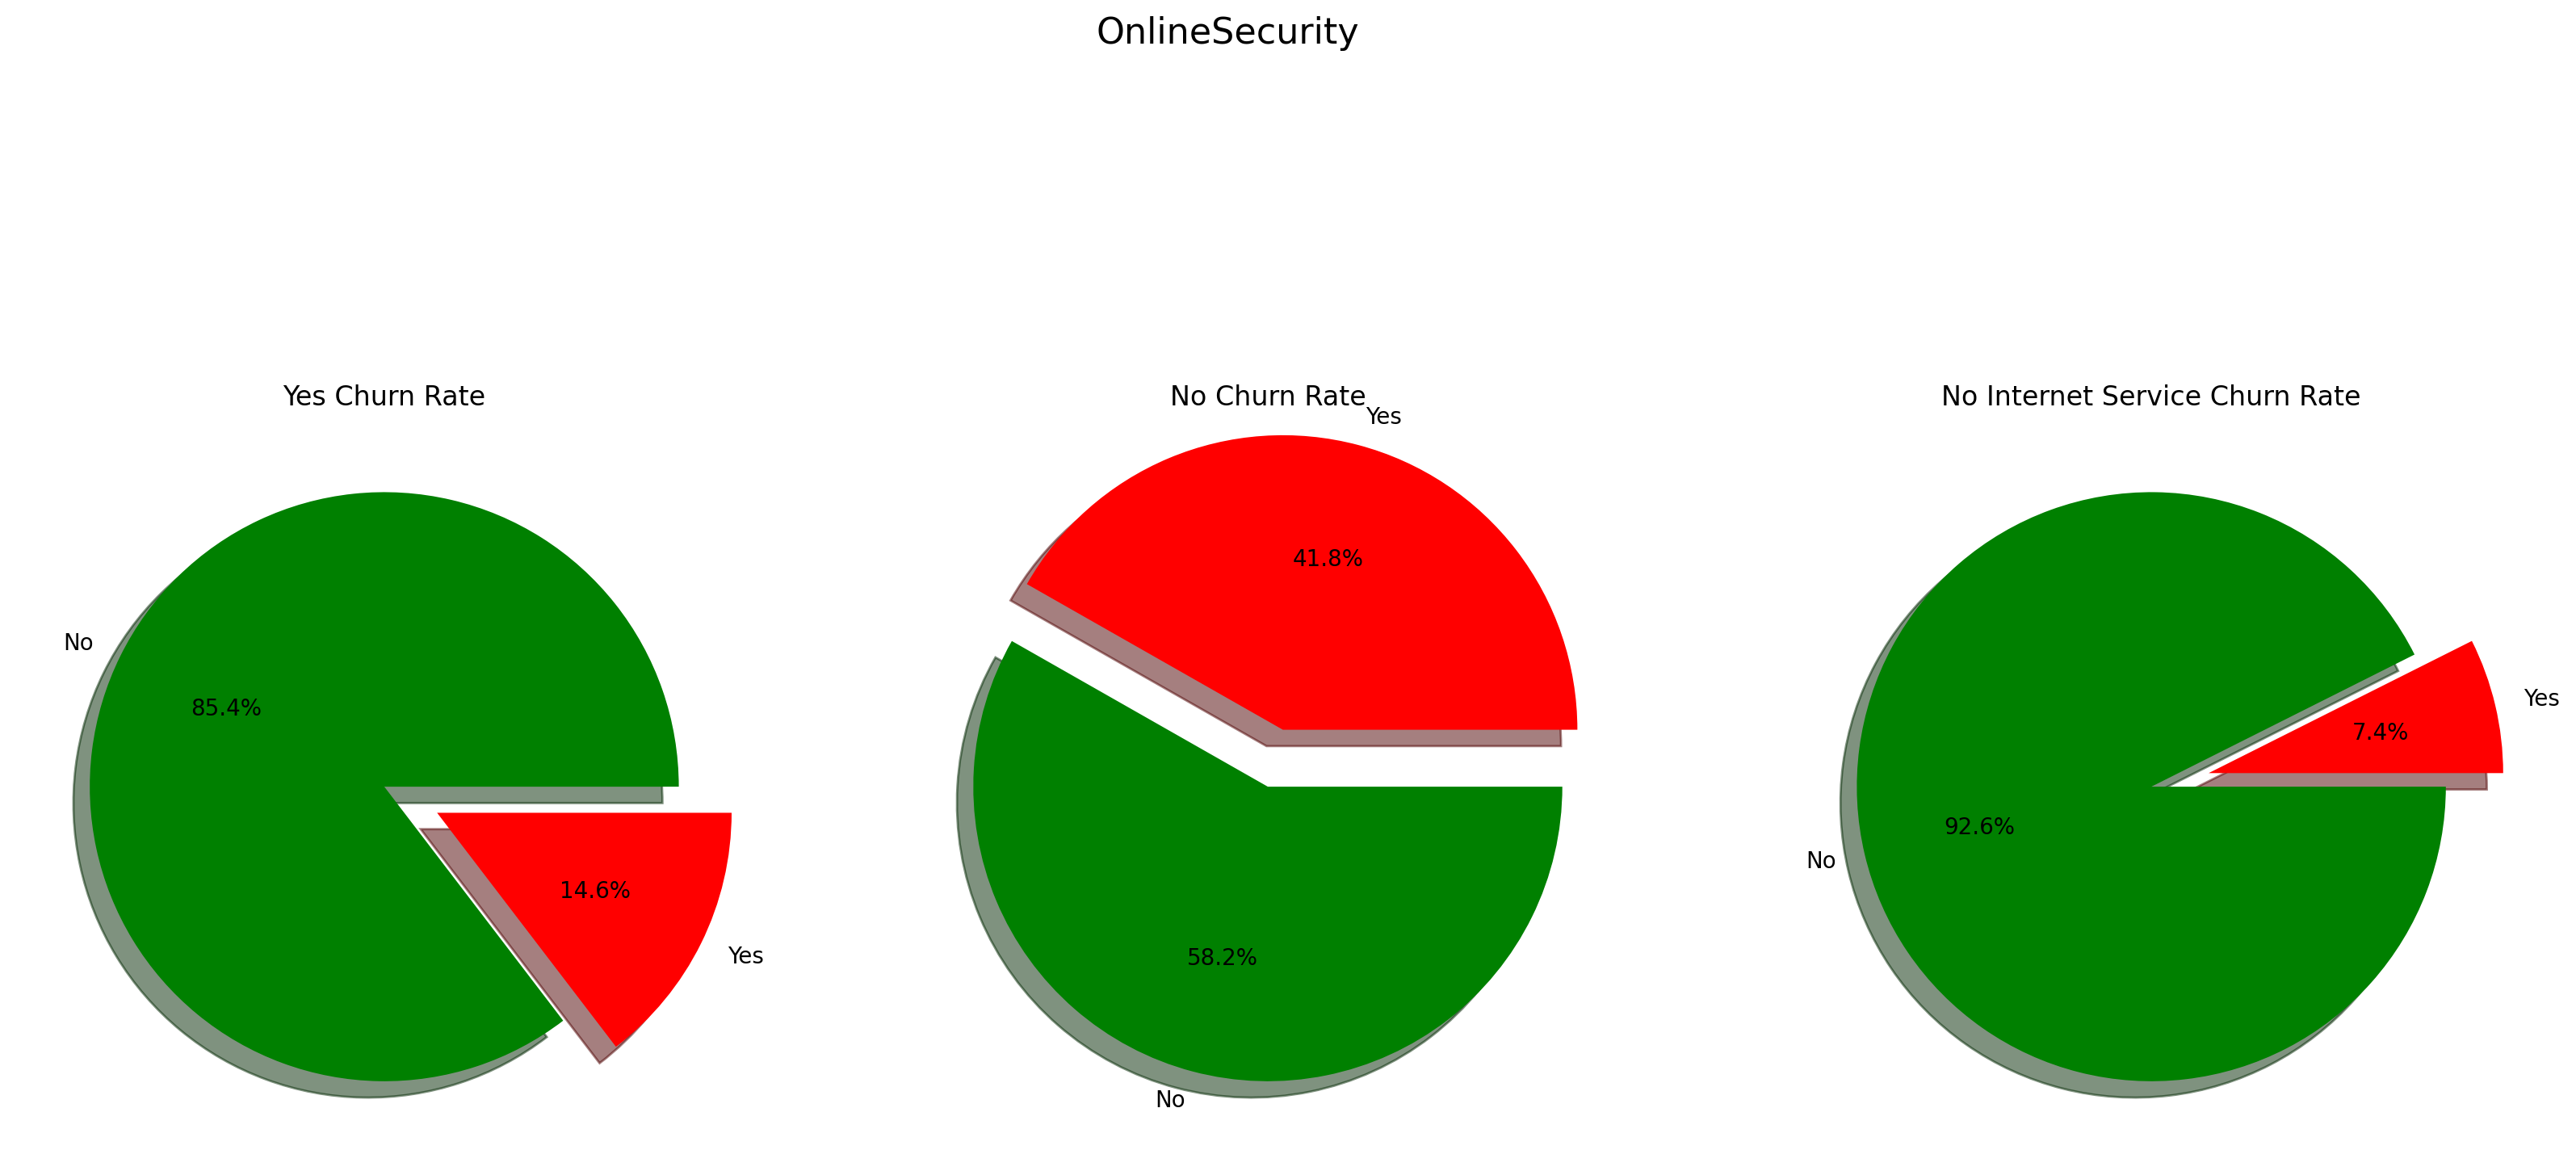

In [142]:
df['COUNT'] = 1
table=df.pivot_table( index = 'Churn' , columns = 'OnlineSecurity' , values = 'COUNT', aggfunc = 'sum')
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 10) , dpi = 200)

fig.suptitle('OnlineSecurity', fontsize=16 )
# axs[0].plot -> Line plot
axs[0].pie(table['Yes'].values, colors=['g','r'],
           labels=table['Yes'].index ,
           autopct='%0.1f%%',
counterclock=True, shadow=True,explode=(0.0,0.2))
axs[0].set_title('Yes Churn Rate')

axs[1].pie(table['No'].values, colors=['g','r'],
           labels=table['No'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=True,explode=(0.0,0.2))
axs[1].set_title('No Churn Rate')

axs[2].pie(table['No internet service'].values, colors=['g','r'],
           labels=table['No internet service'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=True,explode=(0.0,0.2))
axs[2].set_title('No Internet Service Churn Rate')

plt.show()

In [143]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,COUNT
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,1
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,1
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,1


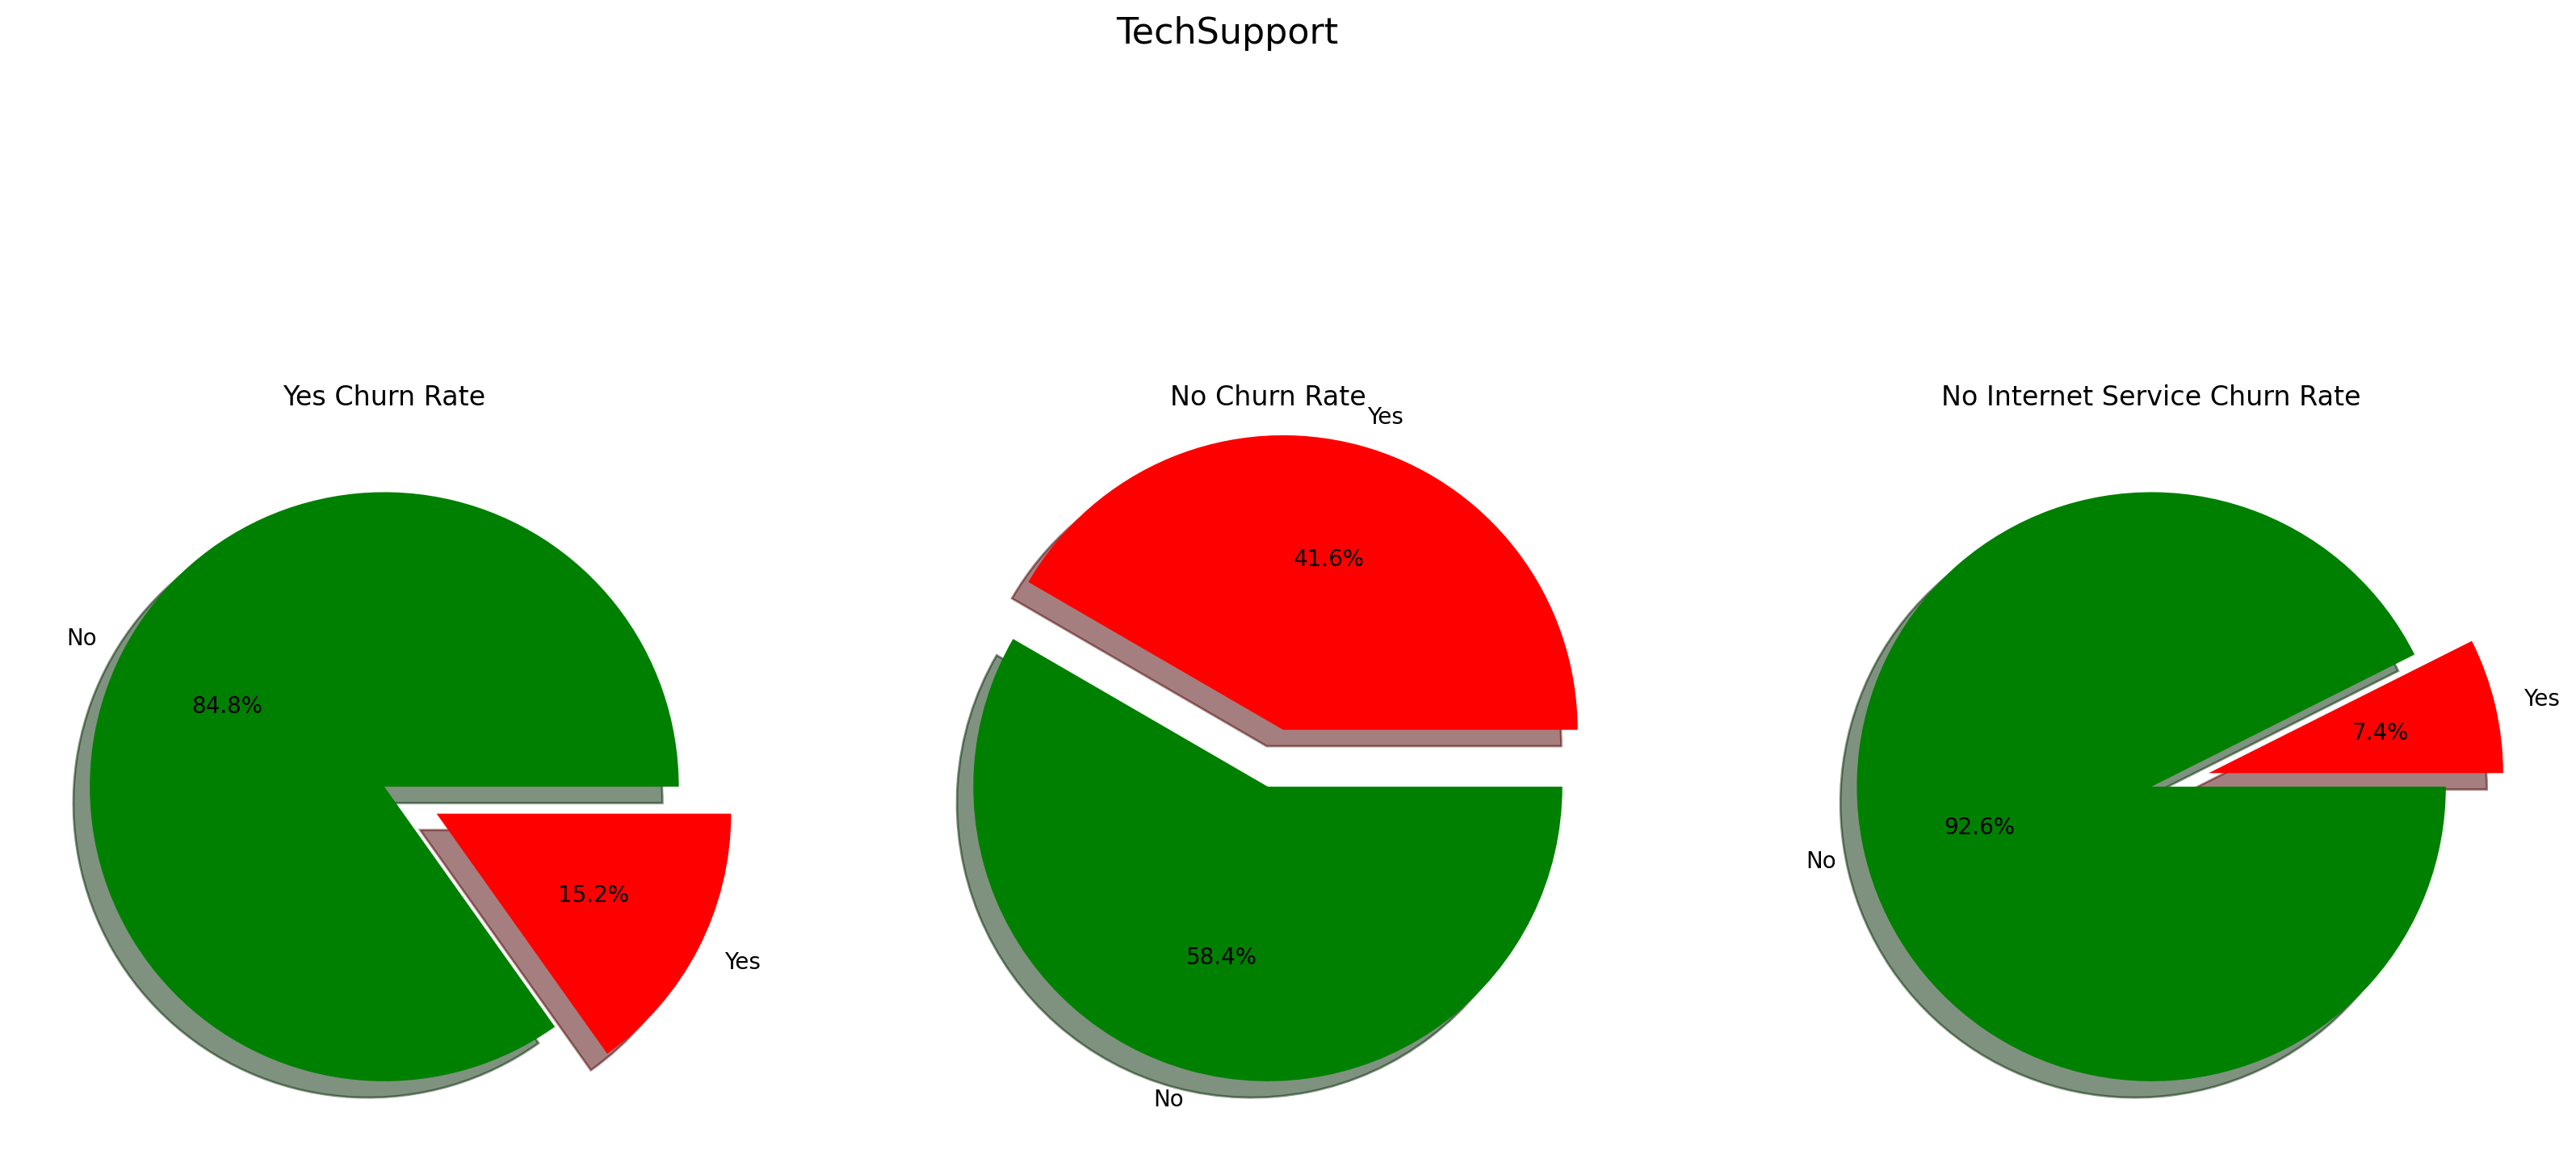

In [144]:
df['COUNT'] = 1
table=df.pivot_table( index = 'Churn' , columns = 'TechSupport' , values = 'COUNT', aggfunc = 'sum')
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 10) , dpi = 200)

fig.suptitle('TechSupport', fontsize=16 )
# axs[0].plot -> Line plot
axs[0].pie(table['Yes'].values, colors=['g','r'],
           labels=table['Yes'].index ,
           autopct='%0.1f%%',
counterclock=True, shadow=True,explode=(0.0,0.2))
axs[0].set_title('Yes Churn Rate')

axs[1].pie(table['No'].values, colors=['g','r'],
           labels=table['No'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=True,explode=(0.0,0.2))
axs[1].set_title('No Churn Rate')

axs[2].pie(table['No internet service'].values, colors=['g','r'],
           labels=table['No internet service'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=True,explode=(0.0,0.2))
axs[2].set_title('No Internet Service Churn Rate')

plt.show()

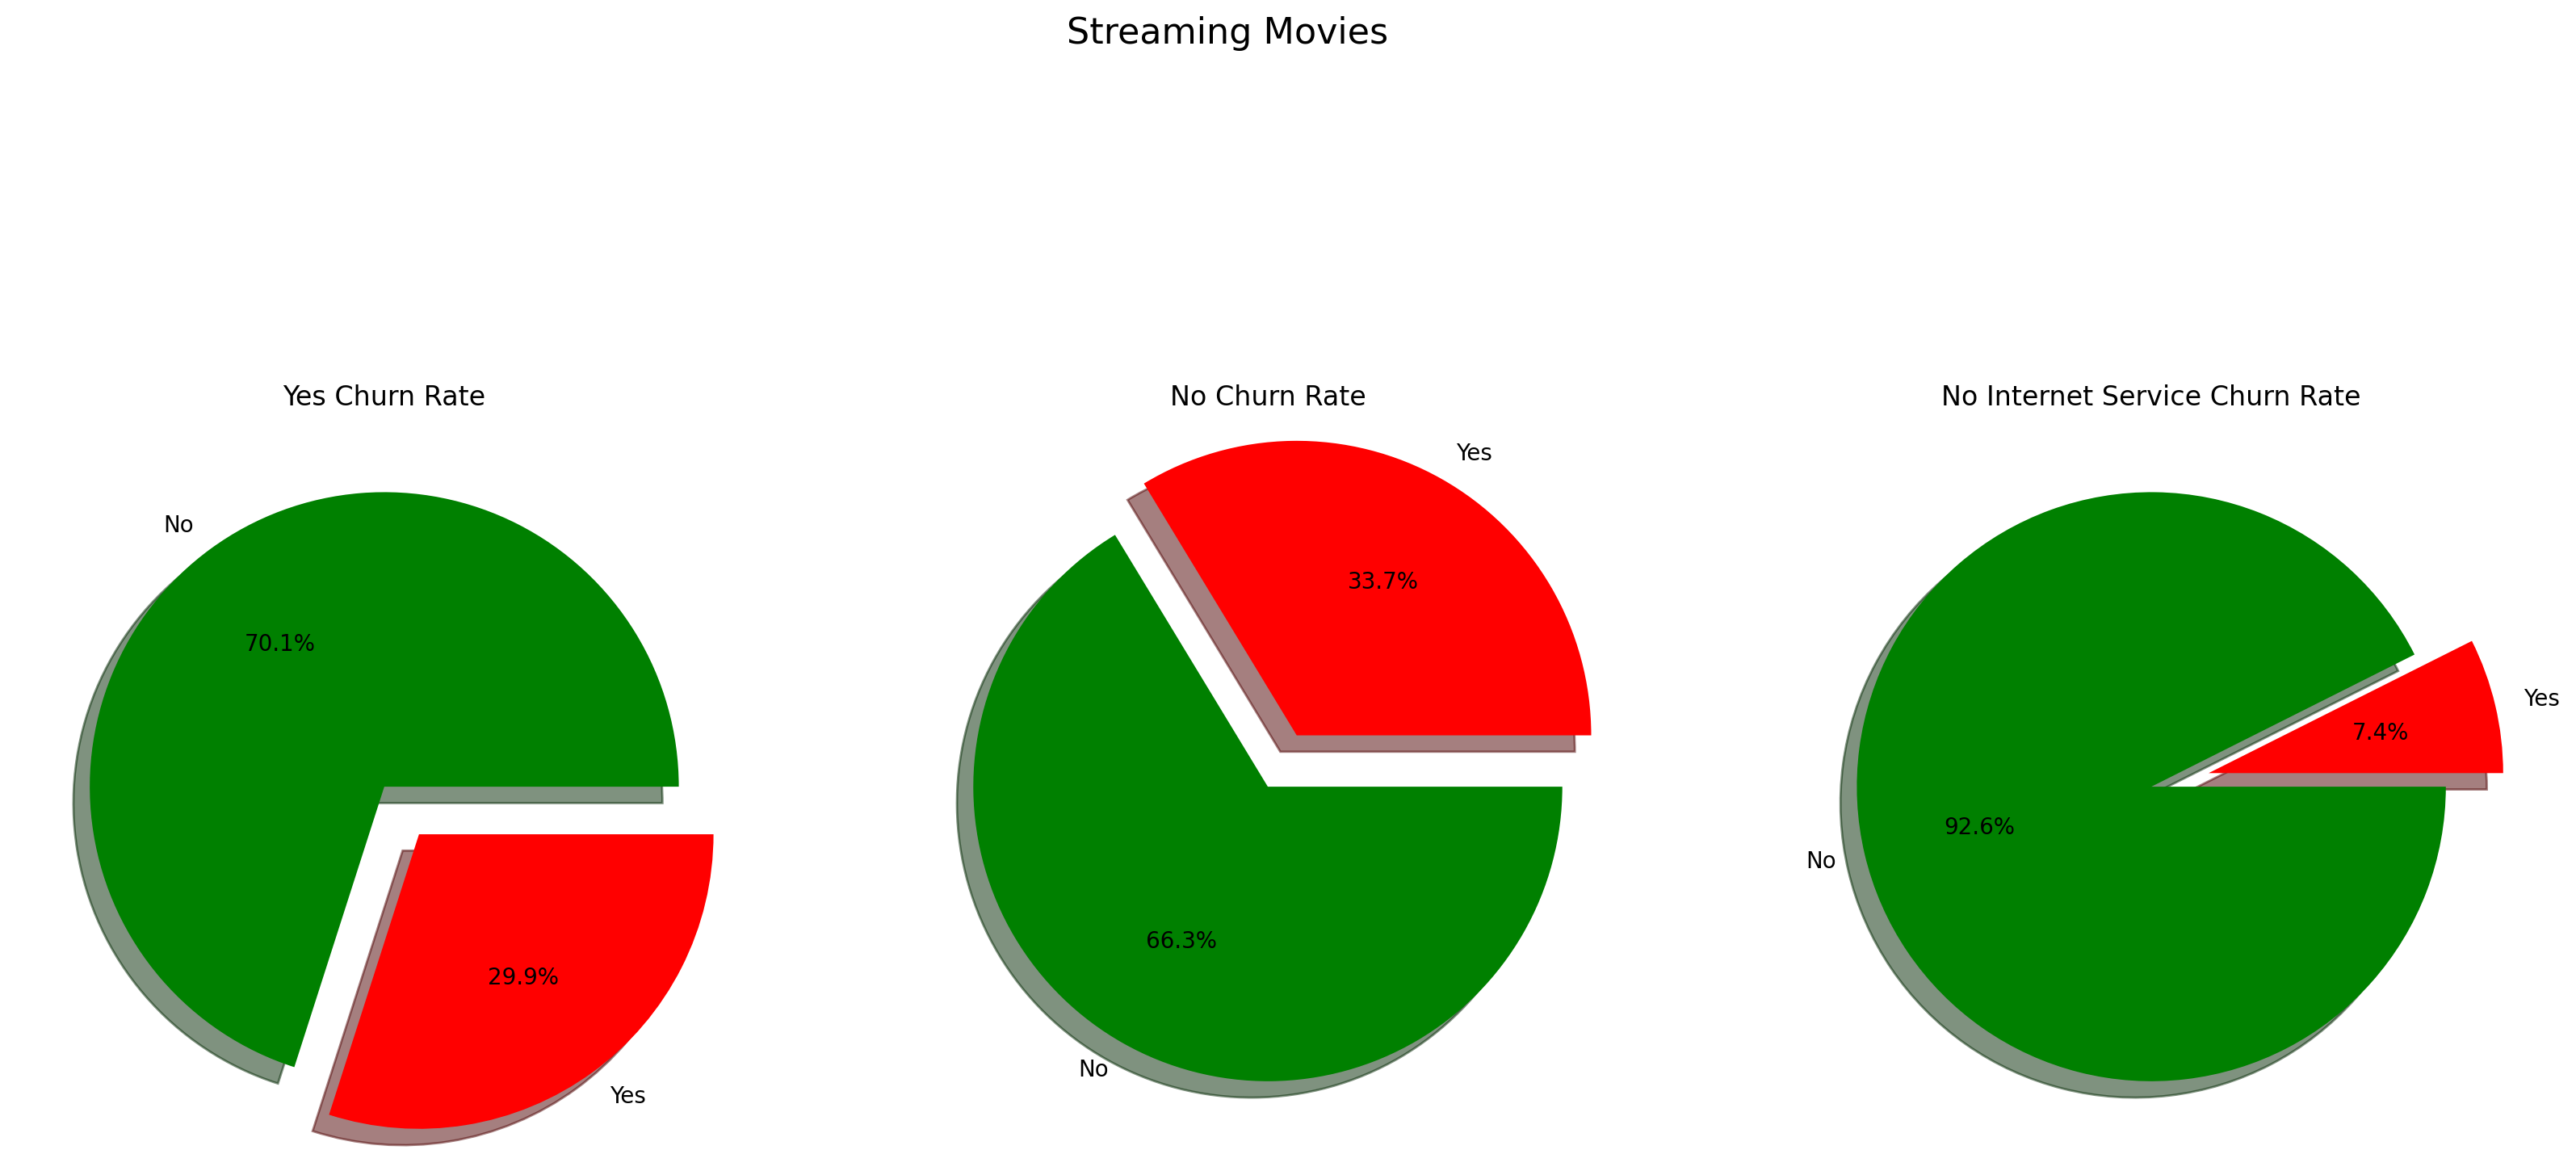

In [145]:
df['COUNT'] = 1
table=df.pivot_table( index = 'Churn' , columns = 'StreamingMovies' , values = 'COUNT', aggfunc = 'sum')
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 10) , dpi = 200)

fig.suptitle('Streaming Movies', fontsize=16 )
# axs[0].plot -> Line plot
axs[0].pie(table['Yes'].values, colors=['g','r'],
           labels=table['Yes'].index ,
           autopct='%0.1f%%',
counterclock=True, shadow=True,explode=(0.0,0.2))
axs[0].set_title('Yes Churn Rate')

axs[1].pie(table['No'].values, colors=['g','r'],
           labels=table['No'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=True,explode=(0.0,0.2))
axs[1].set_title('No Churn Rate')

axs[2].pie(table['No internet service'].values, colors=['g','r'],
           labels=table['No internet service'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=True,explode=(0.0,0.2))
axs[2].set_title('No Internet Service Churn Rate')

plt.show()

In [146]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

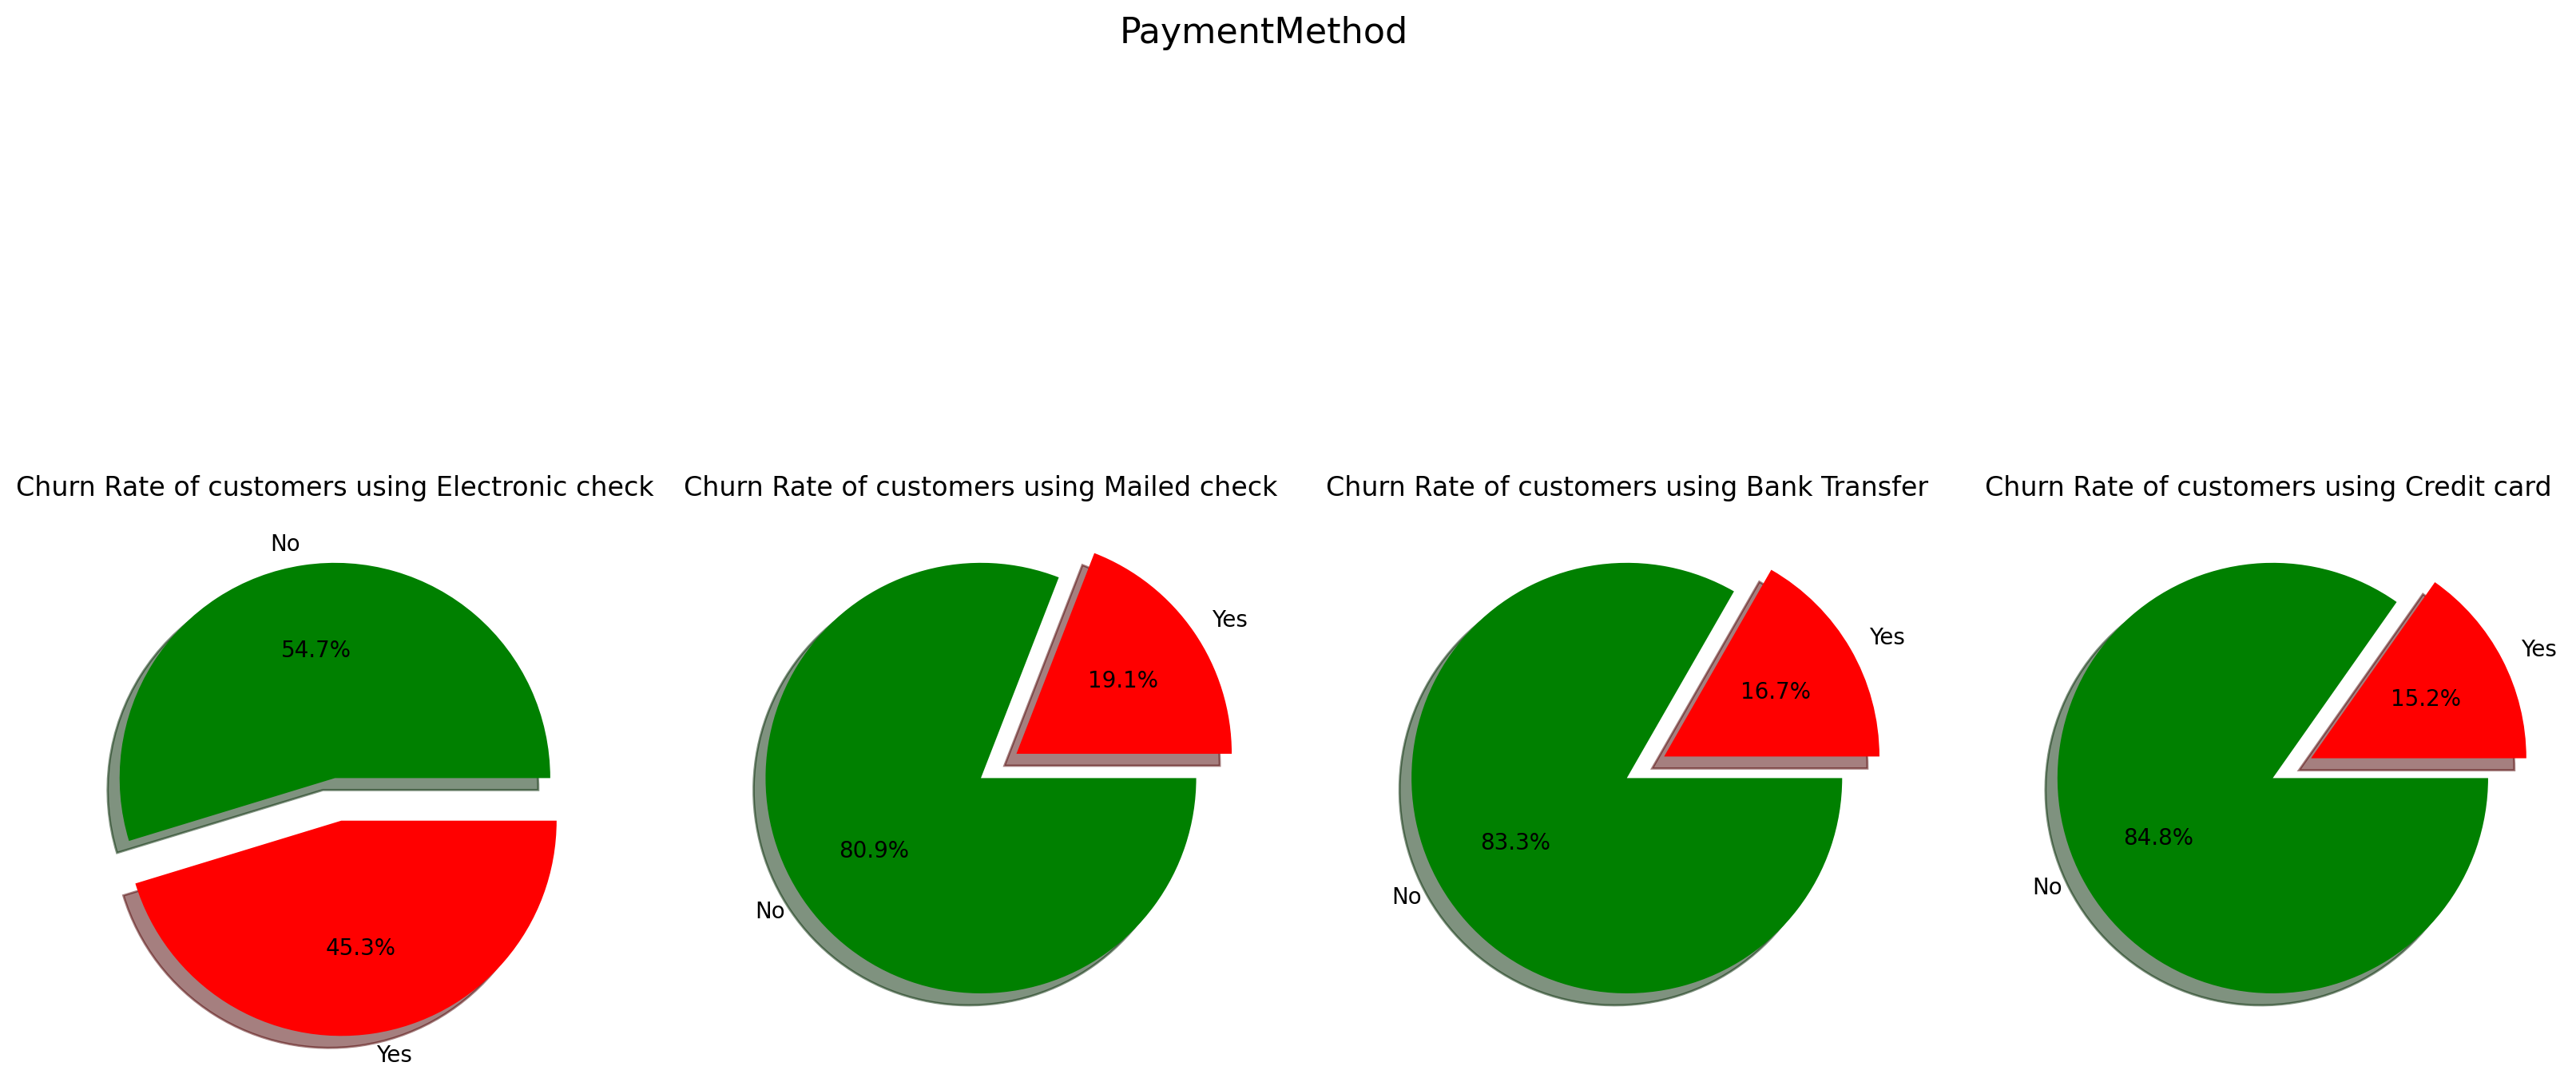

In [147]:
df['COUNT'] = 1
table=df.pivot_table( index = 'Churn' , columns = 'PaymentMethod' , values = 'COUNT', aggfunc = 'sum')
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 10) , dpi = 200)

fig.suptitle('PaymentMethod', fontsize=16 )
# axs[0].plot -> Line plot
axs[0].pie(table['Electronic check'].values, colors=['g','r'],
           labels=table['Electronic check'].index ,
           autopct='%0.1f%%',
counterclock=True, shadow=True,explode=(0.0,0.2))
axs[0].set_title('Churn Rate of customers using Electronic check')

axs[1].pie(table['Mailed check'].values, colors=['g','r'],
           labels=table['Mailed check'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=True,explode=(0.0,0.2))
axs[1].set_title('Churn Rate of customers using Mailed check')

axs[2].pie(table['Bank transfer (automatic)'].values, colors=['g','r'],
           labels=table['Bank transfer (automatic)'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=True,explode=(0.0,0.2))
axs[2].set_title('Churn Rate of customers using Bank Transfer')

axs[3].pie(table['Credit card (automatic)'].values, colors=['g','r'],
           labels=table['Credit card (automatic)'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=True,explode=(0.0,0.2))
axs[3].set_title('Churn Rate of customers using Credit card ')

plt.show()

## Bi-variate Analysis using loops

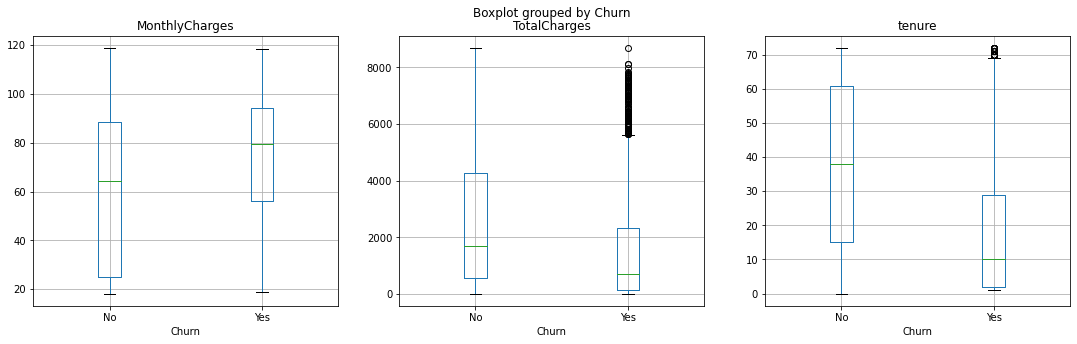

In [148]:
# Box plots for Categorical Target Variable "Survived" and continuous predictors
ContinuousColsList=['MonthlyCharges','TotalCharges','tenure']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Survived"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    df.boxplot(column=PredictorCol, by='Churn', figsize=(5,5), vert=True, ax=PlotCanvas[i])

## Observations (Please verify with statistical tests and use for ML model). 
   - No variation in churn rate w.r.t gender. Both males and females have same churn rate
   - Senior Citizens are more likely to churn 
   - People using Electronic check as a mode of payment are more likely to churn 
   - Independent people are more likely to churn 
   - People with partner are less likely to churn 
   - For some attributes like deviceprotection, onlinesecurity,onlinestreaming, techsupport,      streamingmovies...observations are not made but as per visual analysis these variables can be taken for ML subject to verification in statistical tests. 

## Inferences from visual analysis and othe exploratory steps. Following steps should be confirmed with statistical tests and be used for creating machine learning model 
  - Gender column can be dropped 
  - PhoneService column can be dropped
  - Tenure needs to be grouped
  - No outliers in the dataset which is very evident from the histogram
  - No missing values in this dataset 
 
  
  